In [195]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train_V2.csv


In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# Importing the dataset
df=pd.read_csv('../input/train_V2.csv')

In [198]:
df_copy=df.copy() #copy of original dataset

In [199]:
#damageDealt can not be in point 

df_copy['damageDealt']=round(df_copy['damageDealt'])

In [200]:
df.shape

(4446966, 29)

In [201]:
df.isnull().sum() #only one null value will drop it

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [202]:
df.dropna(inplace=True)

In [203]:
df.shape

(4446965, 29)

# Column wise data wragling and cleaning

In [204]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [205]:
# damageDealt will be in int data type
# longestKill will be in int data type
# matchType will be category data type

df_copy['damageDealt']=df_copy['damageDealt'].astype('int')
df_copy['longestKill']=df_copy['longestKill'].astype('int')
df_copy['matchType']=df_copy['matchType'].astype('category')

In [206]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        int64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        int64
matchDuration      int64
matchType          category
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: category(1), float64(4), int64(21), object(3)
memory usage: 954.2+ MB


In [207]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints',
       'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'], dtype=object)

In [208]:
df_copy['assists'].sort_values(ascending=False) #it is highly unlikely to do zero assist and win the game 

1462706    22
156599     21
334400     20
1025279    17
3291955    17
           ..
2822440     0
2822439     0
2822438     0
2822437     0
0           0
Name: assists, Length: 4446966, dtype: int64

In [209]:
df_copy=df_copy[(df_copy['assists']>0)] #removing them who did zero assists

In [210]:
df_copy.shape

(779306, 29)

In [211]:
df_copy['boosts'].sort_values(ascending=False) #it is highly unlikely to carry more than 10 boots

1973920    23
59311      21
2621420    21
4143061    20
3840888    19
           ..
2152986     0
2153007     0
2153013     0
2153059     0
2           0
Name: boosts, Length: 779306, dtype: int64

In [212]:
df_copy=df_copy[(df_copy['boosts']<=10)] #removing them who carried more than 10 boosts

In [213]:
df_copy['damageDealt'].sort_values(ascending=False) #damageDealt is highly unlikely to be zero 

334400     6616
1248348    6375
3431247    5990
672993     5793
770454     5557
           ... 
1451407       0
583477        0
583511        0
3088853       0
717626        0
Name: damageDealt, Length: 777891, dtype: int64

In [214]:
df_copy=df_copy[(df_copy['damageDealt']>0)]

In [215]:
df_copy['DBNOs'].value_counts() #it is highlt unlike that some group has knocked more than 25 enemies

0     272503
1     216639
2     125322
3      65379
4      33081
5      16989
6       8730
7       4477
8       2350
9       1276
10       755
11       424
12       331
13       206
14       127
15        97
16        65
17        62
18        49
19        24
20        23
21        20
22        16
25        15
23        14
26        10
24         9
33         7
27         6
28         3
39         2
31         2
32         2
35         1
38         1
40         1
30         1
29         1
53         1
Name: DBNOs, dtype: int64

In [216]:
df_copy=df_copy[df_copy['DBNOs']<=25]

In [217]:
df_copy['headshotKills'].value_counts() #no need to do anything

0     514724
1     164090
2      47325
3      14511
4       4783
5       1820
6        731
7        421
8        219
9        130
10        62
11        51
12        36
13        24
14        10
16         8
17         7
15         6
18         5
23         3
19         2
20         2
26         2
27         2
31         2
46         1
21         1
35         1
39         1
40         1
42         1
64         1
Name: headshotKills, dtype: int64

In [218]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints',
       'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'], dtype=object)

In [219]:
df_copy['heals'].value_counts() # it is highly inlikely to carry more than 15 to 20 healings bag will get full and ammo cant be carried

0     227633
1     149805
2      96400
3      66344
4      47880
5      41508
6      29920
7      23160
8      16432
9      11679
10      9440
11      7014
12      5306
13      3906
14      2980
15      2293
16      1773
17      1313
18       987
19       703
20       603
21       429
22       376
23       265
24       199
25       154
26       108
27        98
28        60
29        39
31        39
30        29
32        21
34        16
33        13
35        12
37         8
36         8
39         7
38         3
42         3
40         2
41         2
43         2
44         2
45         2
49         1
59         1
54         1
61         1
48         1
47         1
73         1
Name: heals, dtype: int64

In [220]:
df_copy=df_copy[df_copy['heals']<=20]

In [221]:
df_copy['killPlace'].value_counts() #more kills will give a better rank

1      25305
2      23582
3      21898
4      20529
5      19607
       ...  
96       599
97       418
98       272
99       115
100       44
Name: killPlace, Length: 100, dtype: int64

In [222]:
df_copy['killPoints'].sort_values(ascending=False) #not required column

1238356    2170
1209127    2156
97840      2152
1738714    2150
46958      2140
           ... 
2561513       0
2561534       0
2561549       0
2561568       0
2             0
Name: killPoints, Length: 747079, dtype: int64

In [223]:
df_copy.drop(columns='killPoints',inplace=True)

In [224]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype=object)

In [225]:
df_copy['killStreaks'].value_counts() #nothing needs to e done

1     374683
0     221356
2     130871
3      17904
4       2014
5        159
6         49
7         17
8         15
9          6
11         2
10         2
20         1
Name: killStreaks, dtype: int64

In [226]:
df_copy['kills'].value_counts() #it is highly unlikely to kill more than 20 to 25 enemies for a single person

0     221356
1     194171
2     125514
3      78931
4      48359
5      29770
6      18332
7      11278
8       6878
9       4331
10      2744
11      1669
12      1077
13       743
14       507
15       345
16       228
17       169
18       117
19        95
20        83
22        66
21        54
23        42
24        38
25        22
26        21
28        19
27        18
29        11
30        10
31         9
33         8
35         7
36         7
38         6
37         4
53         4
41         4
34         3
39         3
32         3
42         3
40         2
43         2
44         2
46         2
57         2
56         2
65         1
55         1
66         1
50         1
49         1
48         1
47         1
72         1
Name: kills, dtype: int64

In [227]:
df_copy=df_copy[df_copy['kills']<=25]

In [228]:
df_copy['longestKill'].sort_values(ascending=False) #the minimum distance between can not be zero they can be cheating

895411     1094
996713     1072
2152425    1071
3081503    1059
2592718    1052
           ... 
2166080       0
2166084       0
2166093       0
2166096       0
2             0
Name: longestKill, Length: 746919, dtype: int64

In [229]:
df_copy=df_copy[df_copy['longestKill']>0]

In [230]:
df_copy['matchDuration'].sort_values(ascending=False) #no need to be done

1819806    2237
2086421    2226
4219483    2226
1275805    2226
4204039    2226
           ... 
3234797     209
562695      209
1424521     209
2173572     209
4100680     152
Name: matchDuration, Length: 522321, dtype: int64

In [231]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype=object)

In [232]:
df_copy['matchType'].value_counts() #nothinh needs to be done

squad-fpp           248906
duo-fpp             115825
squad                86771
duo                  35240
solo-fpp             18621
normal-squad-fpp      7115
solo                  6283
normal-duo-fpp        1212
normal-solo-fpp        809
crashfpp               581
flaretpp               331
normal-squad           254
normal-solo            176
flarefpp                96
normal-duo              62
crashtpp                39
Name: matchType, dtype: int64

In [233]:
df_copy['maxPlace'].value_counts() #col not needed 

28    88507
29    71155
27    70755
49    42620
30    38017
      ...  
62        3
59        3
57        3
61        2
53        1
Name: maxPlace, Length: 99, dtype: int64

In [234]:
df_copy['numGroups'].value_counts() #col not required

27    76183
28    69241
26    59027
29    44403
25    33938
      ...  
55        3
57        2
62        2
66        1
54        1
Name: numGroups, Length: 99, dtype: int64

In [235]:
df_copy['rankPoints'].value_counts() #col not required

-1       209788
 1500     28168
 0         9947
 1480      4961
 1490      3945
          ...  
 2613         1
 1076         1
 3210         1
 2405         1
 3961         1
Name: rankPoints, Length: 1713, dtype: int64

In [236]:
df_copy.drop(columns=['maxPlace','numGroups','rankPoints'],inplace=True)

In [240]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc'], dtype=object)

In [241]:
df_copy['revives'].value_counts() #it is highly unlikely to revive more than 10 times 

0     348291
1     129574
2      35232
3       7441
4       1439
5        255
6         47
7         14
8         10
9          3
10         3
12         3
16         2
13         2
15         2
11         1
14         1
23         1
Name: revives, dtype: int64

In [243]:
df_copy=df_copy[df_copy['revives']<=10]

In [245]:
df_copy['rideDistance'].sort_values(ascending=False) #nothing needs to be done

1770335    20440.0
3545142    19730.0
1683900    19700.0
697015     18860.0
1701794    17580.0
            ...   
2056090        0.0
2056092        0.0
2056115        0.0
2056119        0.0
4446948        0.0
Name: rideDistance, Length: 522309, dtype: float64

In [246]:
df_copy['roadKills'].sort_values(ascending=False) #nothing needs to be done

4194275    10
4392612     7
3136462     7
3647940     7
39338       6
           ..
2962620     0
2962623     0
2962631     0
2962637     0
25          0
Name: roadKills, Length: 522309, dtype: int64

In [247]:
df_copy['swimDistance'].sort_values(ascending=False) #it is highly unlikely that someone has swimed more than 1000 he may die of the zone

2327586    2387.0
2784855    2206.0
1092681    1980.0
3862970    1669.0
1937439    1632.0
            ...  
2885839       0.0
2885844       0.0
2885851       0.0
2885855       0.0
25            0.0
Name: swimDistance, Length: 522309, dtype: float64

In [256]:
df_copy=df_copy[df_copy['swimDistance']<1000]

In [237]:
df_copy['winPoints'].value_counts() #Nothing needs to be done

0       302586
1500     15237
1509      2003
1508      1996
1511      1988
         ...  
1895         1
1932         1
1917         1
1292         1
1947         1
Name: winPoints, Length: 690, dtype: int64

In [257]:
df_copy['teamKills'].value_counts()

0     509118
1      12094
2        958
3         99
4         15
5          5
12         1
10         1
8          1
6          1
Name: teamKills, dtype: int64

In [262]:
df_copy[(df_copy['teamKills']==0) & (df_copy['kills']>0)].shape #it is false data ... if kill is more than zero teamkills can not be zero... data is not given properly in this column

(509118, 25)

In [267]:
df_copy.drop(columns='teamKills',inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [268]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'], dtype=object)

In [269]:
df_copy['vehicleDestroys'].value_counts() #can be correct data nothing needs to be done

0    511204
1     10523
2       517
3        41
4         5
5         3
Name: vehicleDestroys, dtype: int64

In [270]:
df_copy['walkDistance'].sort_values(ascending=False) #who has walked zero distance are likely to be cheating ... should walk at least 100m

3584192    13960.0
4405009    13430.0
3174767    13170.0
2699199    13000.0
1181795    12180.0
            ...   
3947248        0.0
2816750        0.0
2138364        0.0
3944647        0.0
2330690        0.0
Name: walkDistance, Length: 522293, dtype: float64

In [273]:
df_copy=df_copy[df_copy['walkDistance']>100]

In [274]:
df_copy['weaponsAcquired'].value_counts() # it is highly unlikely that someone will change their weapon more than 10 times max

4      99049
5      95743
3      77276
6      73698
7      48608
       ...  
66         1
63         1
57         1
55         1
177        1
Name: weaponsAcquired, Length: 79, dtype: int64

In [277]:
df_copy=df_copy[df_copy['weaponsAcquired']<=10]

In [281]:
df_copy[(df_copy['winPoints']==0) & (df_copy['winPlacePerc']>0)] #it is strange to see that without winpoints how anyone can have any winning chances merely impossible

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
38,5cb863f7ac0dcd,667d7cda387b5c,2d3bb641903718,1,0,318,2,0,0,5,...,duo-fpp,0,0.0,0,0.0,0,2303.0,2,0,0.7021
45,921456e81f6fe7,8c727e2173f5b0,6415c14bf43a33,3,1,395,2,1,2,13,...,squad-fpp,0,0.0,0,0.0,0,2003.0,3,0,0.8077
61,dd87e30dc17eff,629ff5d2728458,f4f95b16c74a74,1,4,135,1,0,4,8,...,duo-fpp,0,0.0,0,0.0,0,2593.0,7,0,0.9091
67,22252be49d4419,37fa7583da2fa2,1ce1cb998f75c7,1,5,379,2,3,6,4,...,squad-fpp,0,317.7,0,0.0,1,3120.0,4,0,1.0000
76,5bb54605cf686f,f404c85b448b84,95b1fd3ad3f3a8,1,2,83,1,0,1,40,...,squad-fpp,0,0.0,0,0.0,0,576.7,3,0,0.2857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446859,5cf1712ef2e8cd,6f7622ca64e1c6,8b9aea18a1385d,1,6,148,1,0,1,24,...,squad-fpp,0,765.0,0,0.0,0,2060.0,5,0,0.8148
4446860,0c6239141b6602,46b419cadae63c,08d92261eca9e0,1,4,193,0,0,3,23,...,duo-fpp,0,3752.0,0,0.0,0,2750.0,5,0,0.9375
4446923,6af47fc1303a4a,1d0c7926278d49,25f71562df42d6,2,0,164,1,0,0,17,...,squad-fpp,0,0.0,0,0.0,0,194.6,2,0,0.4000
4446931,e059d95e0827e2,7b22962b0b7967,909e0493eb3c9d,1,1,30,0,0,1,12,...,squad,2,149.3,0,0.0,0,2967.0,5,0,0.9615


In [291]:
df_copy.drop(columns='winPoints',inplace=True)

In [284]:
df_copy['winPlacePerc']=df_copy['winPlacePerc']*100

In [285]:
df_copy['winPlacePerc'].value_counts()

100.00    67209
96.30      8211
92.59      7186
88.89      6713
96.43      6620
          ...  
43.59         1
62.75         1
86.57         1
30.56         1
85.33         1
Name: winPlacePerc, Length: 1565, dtype: int64

In [286]:
df_copy['winPlacePerc'].sort_values(ascending=False) #who has zero winning chance has no use here

3753022    100.0
1727099    100.0
2654267    100.0
3703782    100.0
718337     100.0
           ...  
1443075      0.0
298169       0.0
2946021      0.0
2945617      0.0
2484400      0.0
Name: winPlacePerc, Length: 497153, dtype: float64

In [289]:
df_copy=df_copy[df_copy['winPlacePerc']>0]

****Cleaned Data :-****

In [292]:
df_copy

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchDuration,matchType,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
25,4c45dc732689ec,8e0a0ea95d3596,37f43ba55ec0a4,1,4,559,3,0,4,11,...,1841,duo-fpp,0,1183.0,0,0.0,0,2711.0,7,86.96
38,5cb863f7ac0dcd,667d7cda387b5c,2d3bb641903718,1,0,318,2,0,0,5,...,1365,duo-fpp,0,0.0,0,0.0,0,2303.0,2,70.21
45,921456e81f6fe7,8c727e2173f5b0,6415c14bf43a33,3,1,395,2,1,2,13,...,1449,squad-fpp,0,0.0,0,0.0,0,2003.0,3,80.77
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,561,5,2,9,4,...,1374,squad,0,0.0,0,0.0,0,2190.0,7,64.00
58,a02d62f153b033,69745bfb9412d9,6945783270e8dc,1,1,133,1,0,1,47,...,1196,squad-fpp,0,0.0,0,0.0,0,127.7,1,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446907,fa8d5a94bc9fda,af646efa2beba6,481a02a43e7de6,1,0,186,1,0,1,36,...,1262,squad-fpp,0,0.0,0,0.0,0,111.7,1,42.86
4446923,6af47fc1303a4a,1d0c7926278d49,25f71562df42d6,2,0,164,1,0,0,17,...,1358,squad-fpp,0,0.0,0,0.0,0,194.6,2,40.00
4446931,e059d95e0827e2,7b22962b0b7967,909e0493eb3c9d,1,1,30,0,0,1,12,...,1370,squad,2,149.3,0,0.0,0,2967.0,5,96.15
4446937,68100cdb23f1f0,9b8970931c5d00,ce5a23d8bb7883,1,2,127,1,1,4,31,...,1414,duo-fpp,0,0.0,0,0.0,0,1364.0,5,71.11


# Categorical col

- matchType
- assists

# Numerical col

* boosts
* damageDealt
* DBNOs
* headshotKills
* heals
* killPlace
* killPoints
* kills
* killStreaks
* longestKill
* matchDuration
* maxPlace
* numGroups
* rankPoints
* revives
* rideDistance
* roadKills
* swimDistance
* teamKills
* vehicleDestroys
* walkDistance
* weaponsAcquired
* winPoints
* winPlacePerc

# Mixed Col
- Id
- groupId
- matchId


In [293]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,...,8.920103e+02,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,1.500000e+03,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


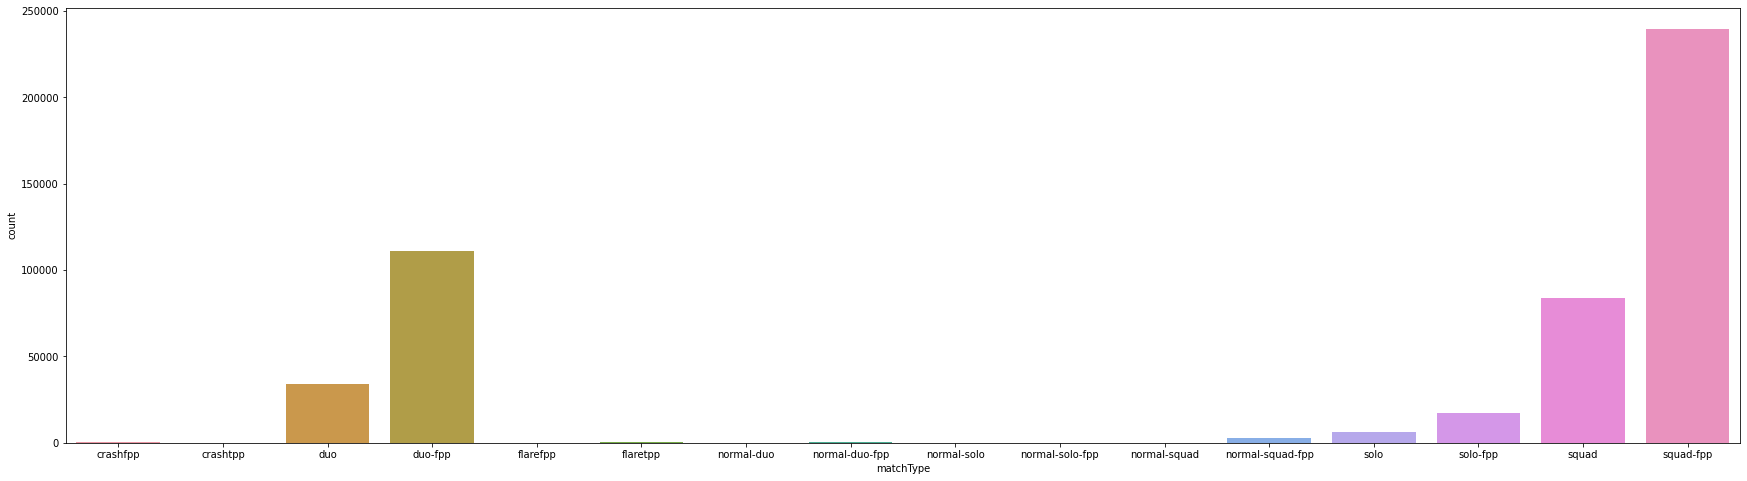

In [294]:
#for matchType column

plt.figure(figsize=(30,8))
sns.countplot(df_copy['matchType'])
plt.show()

- most the players played squard-fpp

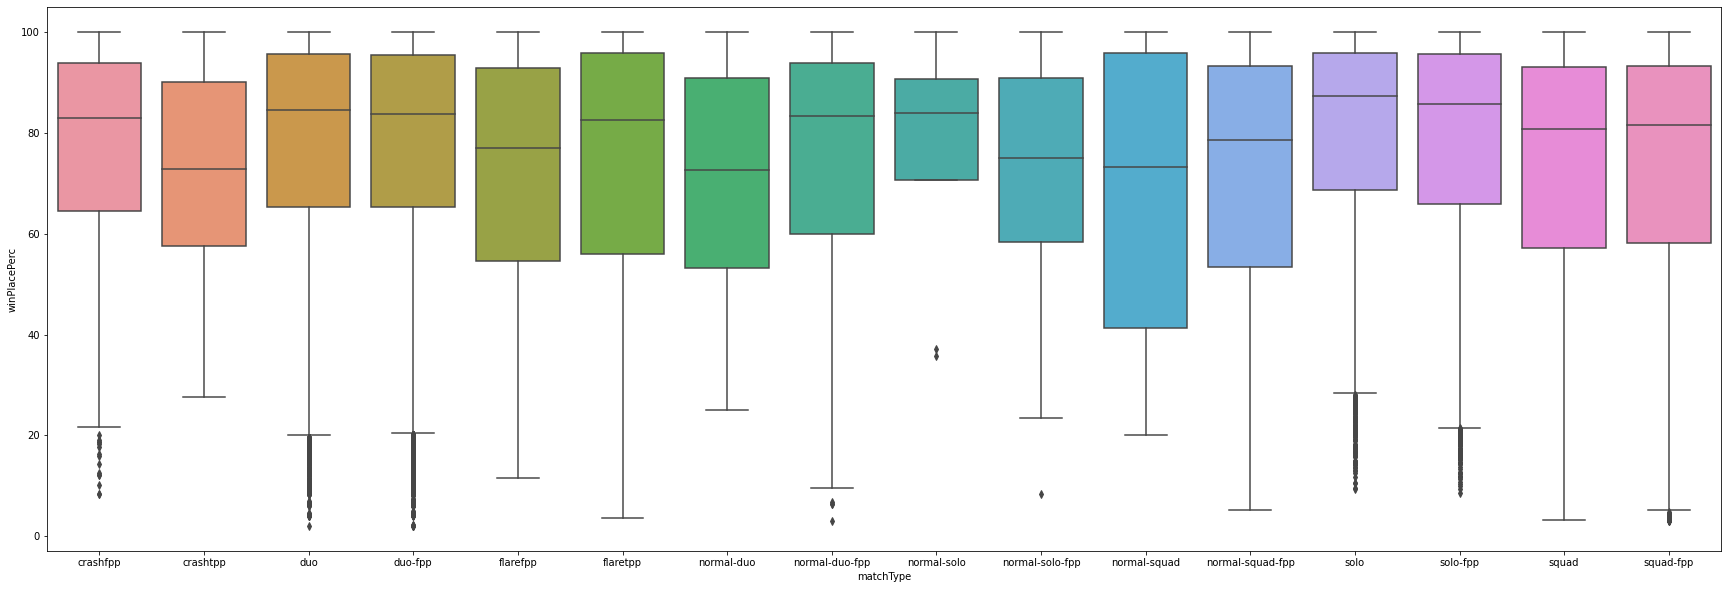

In [295]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['matchType'],y=df_copy['winPlacePerc'])

- normal-squard & normal-squard-fpp has the most winning chances 

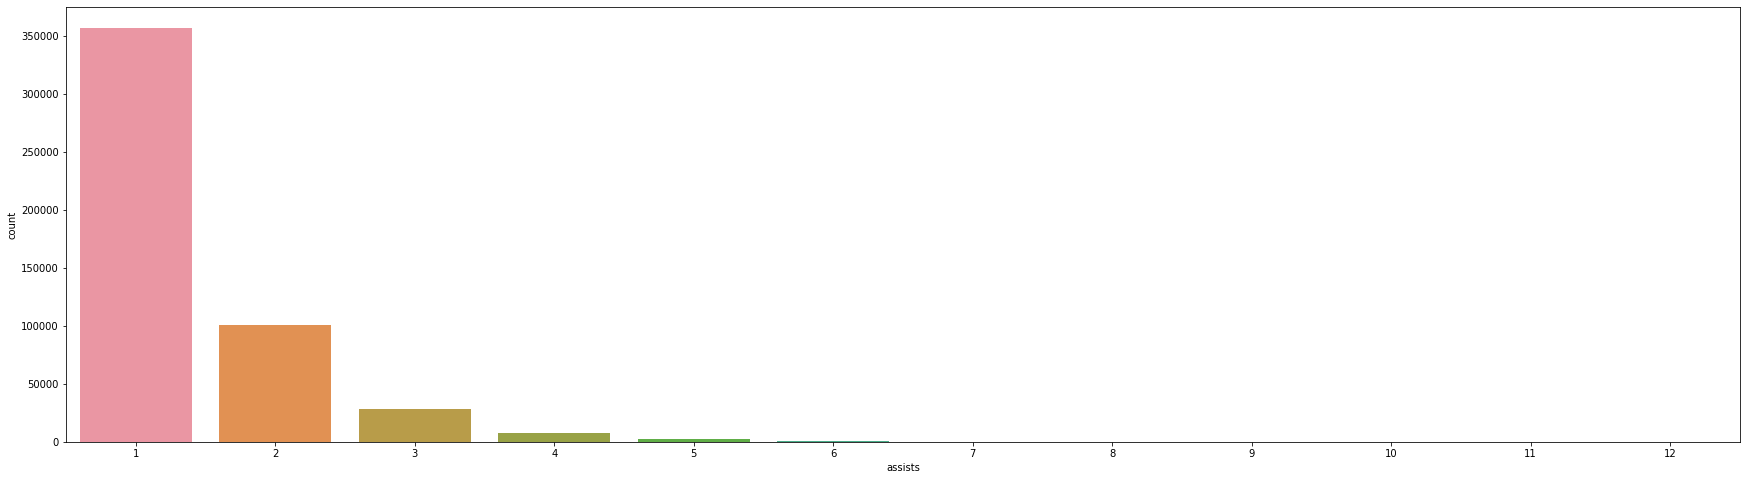

In [301]:
# for assists col

plt.figure(figsize=(30,8))
sns.countplot(df_copy['assists'])
plt.show()

- most players has done only one assist

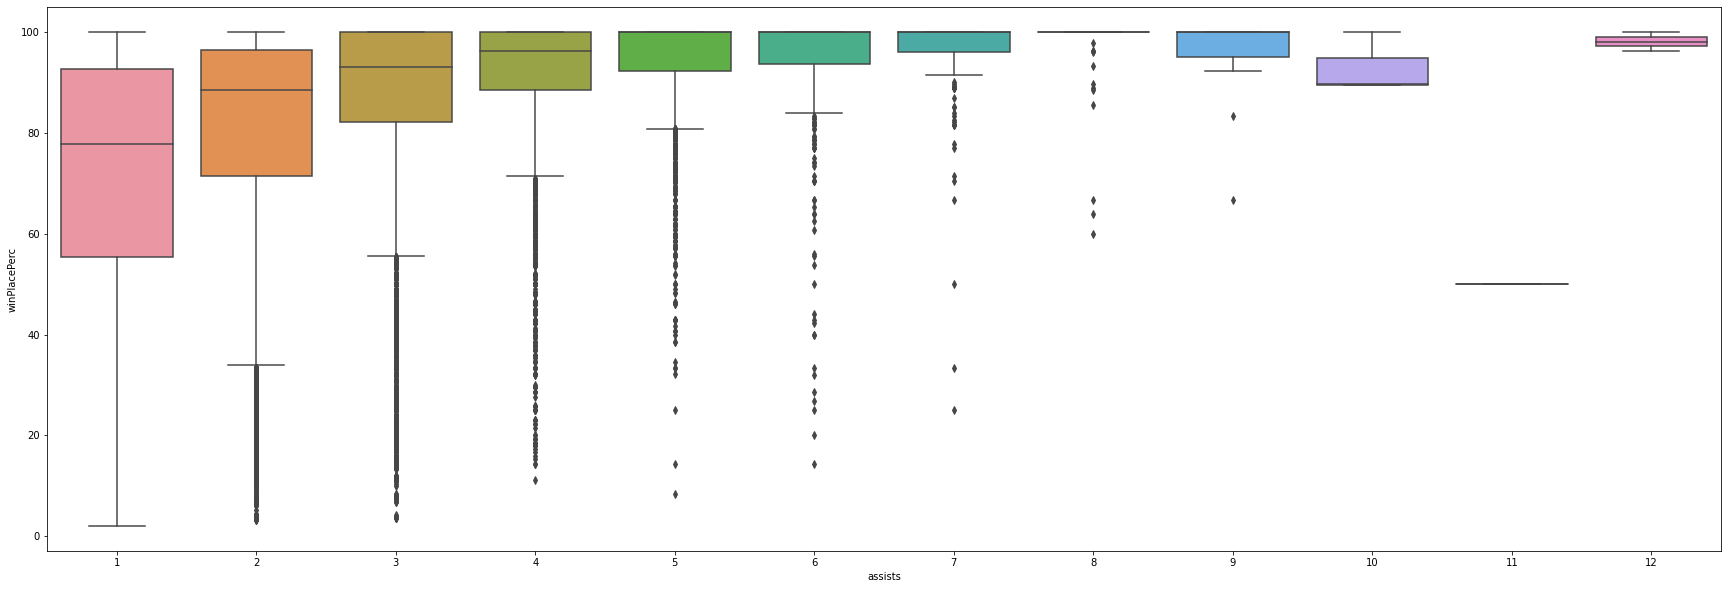

In [302]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['assists'],y=df_copy['winPlacePerc'])

- players doing assists in range of 3 to 7 has more winning chances

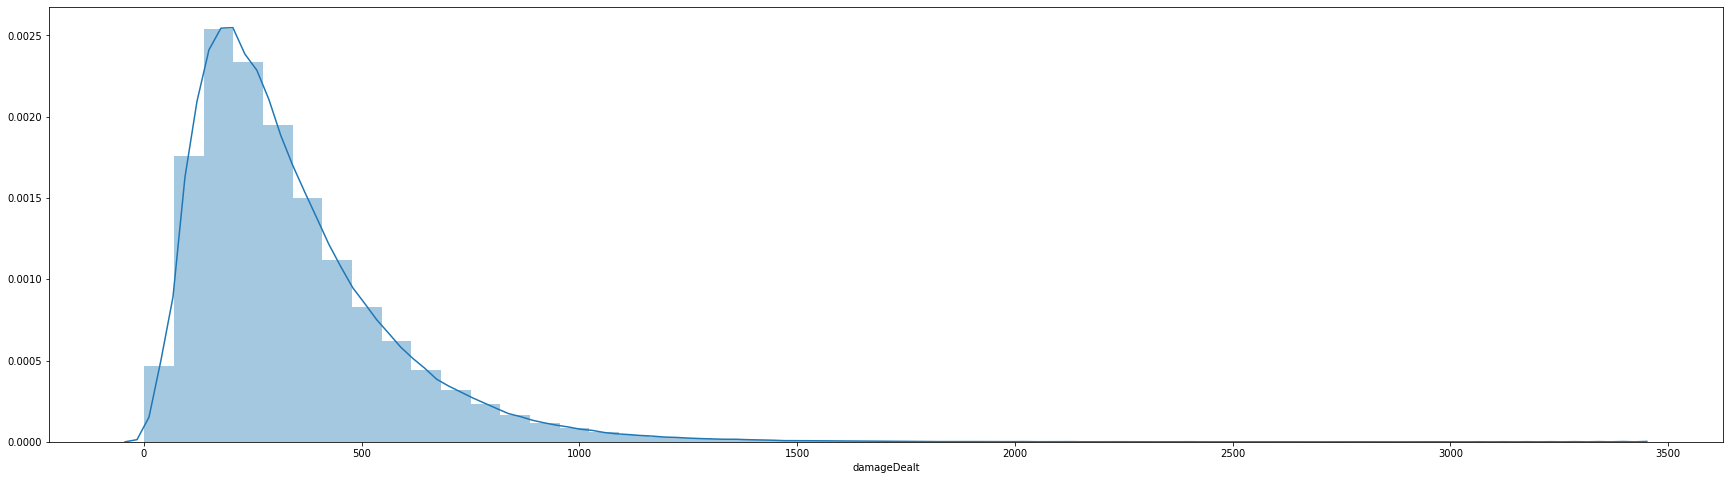

In [303]:
# for damageDealt column

plt.figure(figsize=(30,8))
sns.distplot(df_copy['damageDealt'])
plt.show()

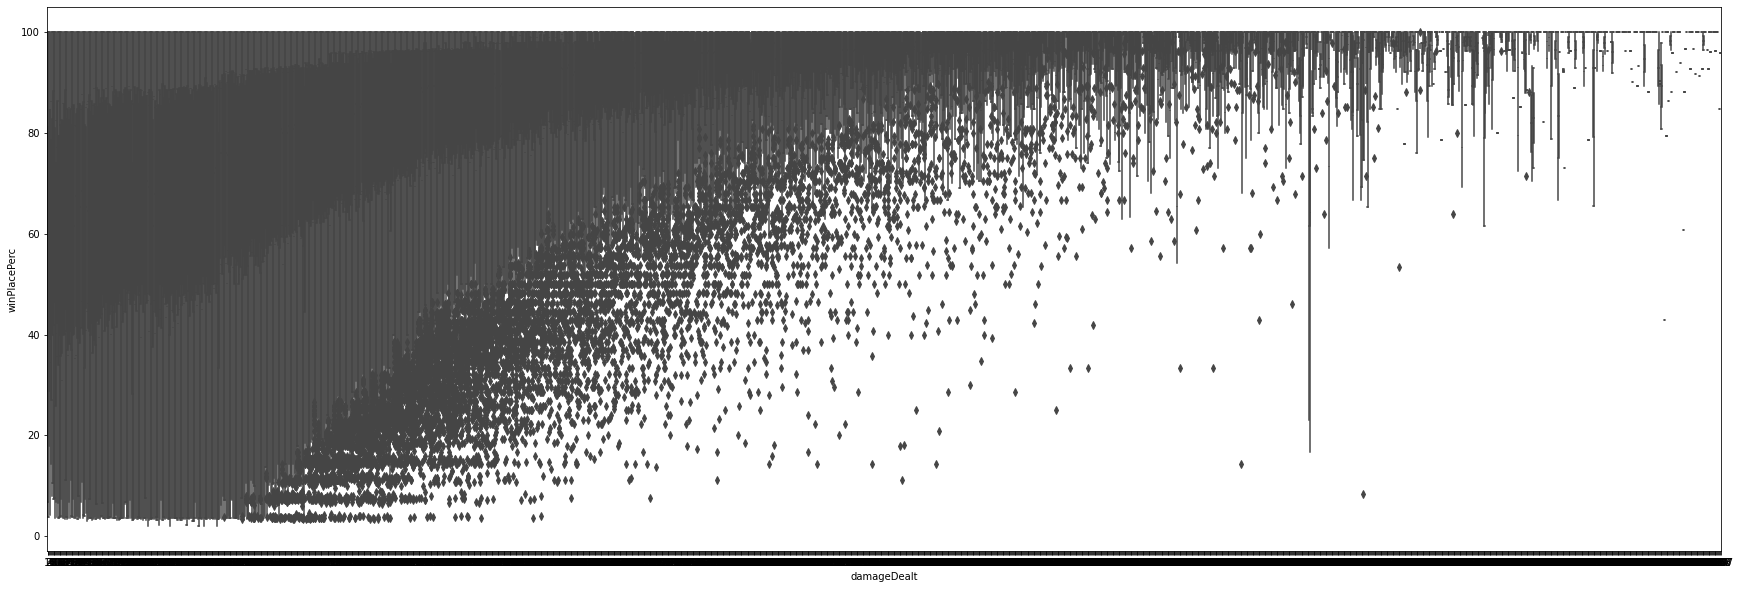

In [304]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['damageDealt'],y=df_copy['winPlacePerc'])

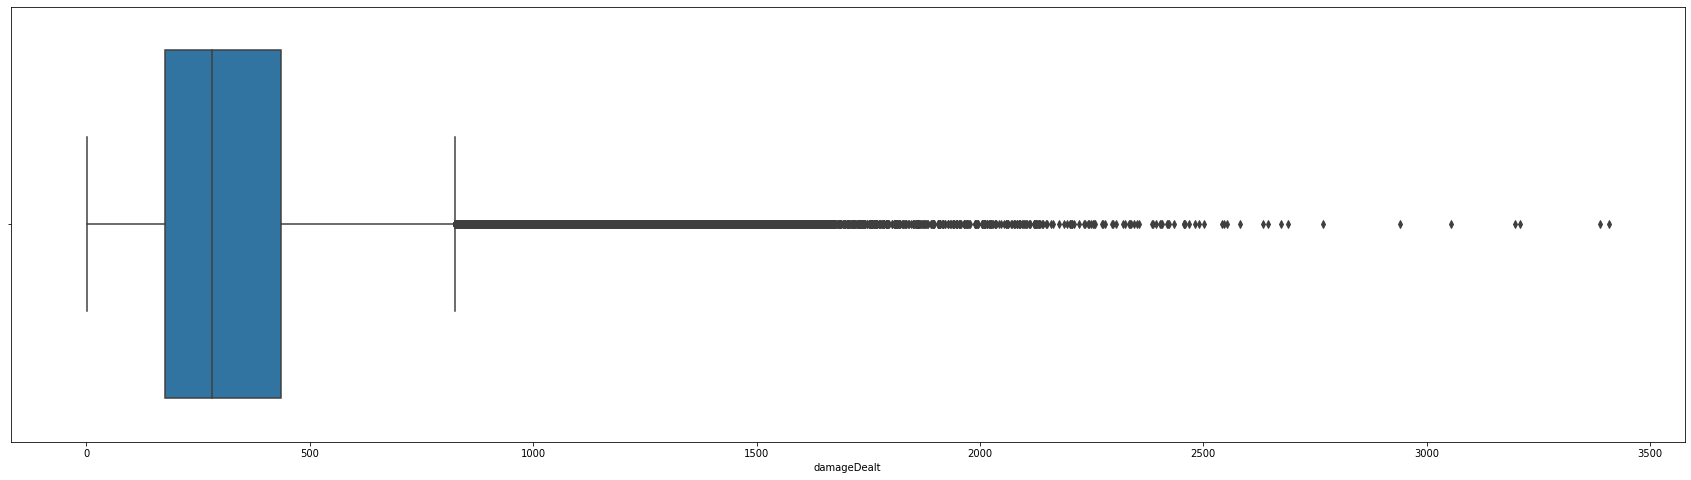

In [305]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['damageDealt'])
plt.show()

In [308]:
df_copy

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchDuration,matchType,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
25,4c45dc732689ec,8e0a0ea95d3596,37f43ba55ec0a4,1,4,559,3,0,4,11,...,1841,duo-fpp,0,1183.0,0,0.0,0,2711.0,7,86.96
38,5cb863f7ac0dcd,667d7cda387b5c,2d3bb641903718,1,0,318,2,0,0,5,...,1365,duo-fpp,0,0.0,0,0.0,0,2303.0,2,70.21
45,921456e81f6fe7,8c727e2173f5b0,6415c14bf43a33,3,1,395,2,1,2,13,...,1449,squad-fpp,0,0.0,0,0.0,0,2003.0,3,80.77
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,561,5,2,9,4,...,1374,squad,0,0.0,0,0.0,0,2190.0,7,64.00
58,a02d62f153b033,69745bfb9412d9,6945783270e8dc,1,1,133,1,0,1,47,...,1196,squad-fpp,0,0.0,0,0.0,0,127.7,1,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446907,fa8d5a94bc9fda,af646efa2beba6,481a02a43e7de6,1,0,186,1,0,1,36,...,1262,squad-fpp,0,0.0,0,0.0,0,111.7,1,42.86
4446923,6af47fc1303a4a,1d0c7926278d49,25f71562df42d6,2,0,164,1,0,0,17,...,1358,squad-fpp,0,0.0,0,0.0,0,194.6,2,40.00
4446931,e059d95e0827e2,7b22962b0b7967,909e0493eb3c9d,1,1,30,0,0,1,12,...,1370,squad,2,149.3,0,0.0,0,2967.0,5,96.15
4446937,68100cdb23f1f0,9b8970931c5d00,ce5a23d8bb7883,1,2,127,1,1,4,31,...,1414,duo-fpp,0,0.0,0,0.0,0,1364.0,5,71.11


In [306]:
winners=df_copy[df_copy['winPlacePerc']>=100] #grops won the matches

In [307]:
winners

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchDuration,matchType,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
67,22252be49d4419,37fa7583da2fa2,1ce1cb998f75c7,1,5,379,2,3,6,4,...,1297,squad-fpp,0,317.7,0,0.0,1,3120.0,4,100.0
123,174c758156bcf3,a935604c9bb7aa,edc87c8d445823,1,9,626,4,3,2,4,...,1405,squad-fpp,0,1045.0,0,0.0,0,2814.0,7,100.0
229,de5d4078b95b3e,f31719bc7a9b81,46fef5beda2edb,2,3,629,4,2,1,4,...,1394,squad,3,203.5,0,0.0,0,2697.0,4,100.0
300,9ac54e66c0a5d3,d973f082d6c416,15535f0f9d9e46,1,7,1120,8,3,1,1,...,1305,squad-fpp,0,0.0,0,0.0,0,3503.0,8,100.0
594,2ff0379b2503c8,cca408f624676f,ed47bceb65c153,1,6,149,0,0,7,24,...,1910,squad,1,5883.0,0,0.0,0,2133.0,6,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446654,8331b07da07d0e,92e8fbebeb6985,abd5d75724fc26,3,6,371,2,0,3,2,...,1872,duo-fpp,2,2302.0,0,0.0,0,4628.0,6,100.0
4446667,c6e20ba5c39b72,7a6396e48fa2d0,06865090ea6288,2,4,155,1,1,5,13,...,1332,squad-fpp,1,0.0,0,0.0,0,2614.0,3,100.0
4446694,0610fee7332541,397565650b3f6e,2c6b1db9035fbc,1,4,502,2,3,4,4,...,1774,duo-fpp,0,3918.0,0,0.0,0,3050.0,5,100.0
4446772,38e4efd74225fd,86772c17c3b57c,08d7f71a4d17bb,1,5,452,2,1,4,1,...,1945,duo,0,4995.0,0,0.0,0,4178.0,5,100.0


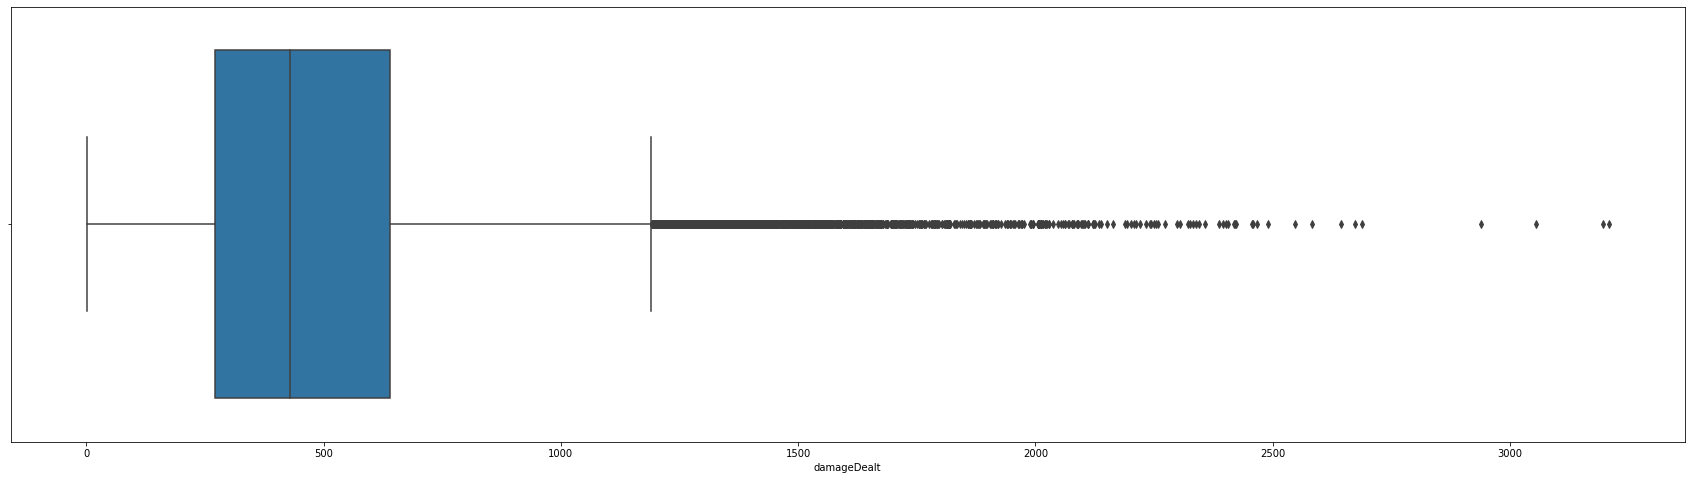

In [309]:
plt.figure(figsize=(30,8))
sns.boxplot(winners['damageDealt'])
plt.show()

- mostly played had taken damage in range of 200 to 700 who had higher chances of winning

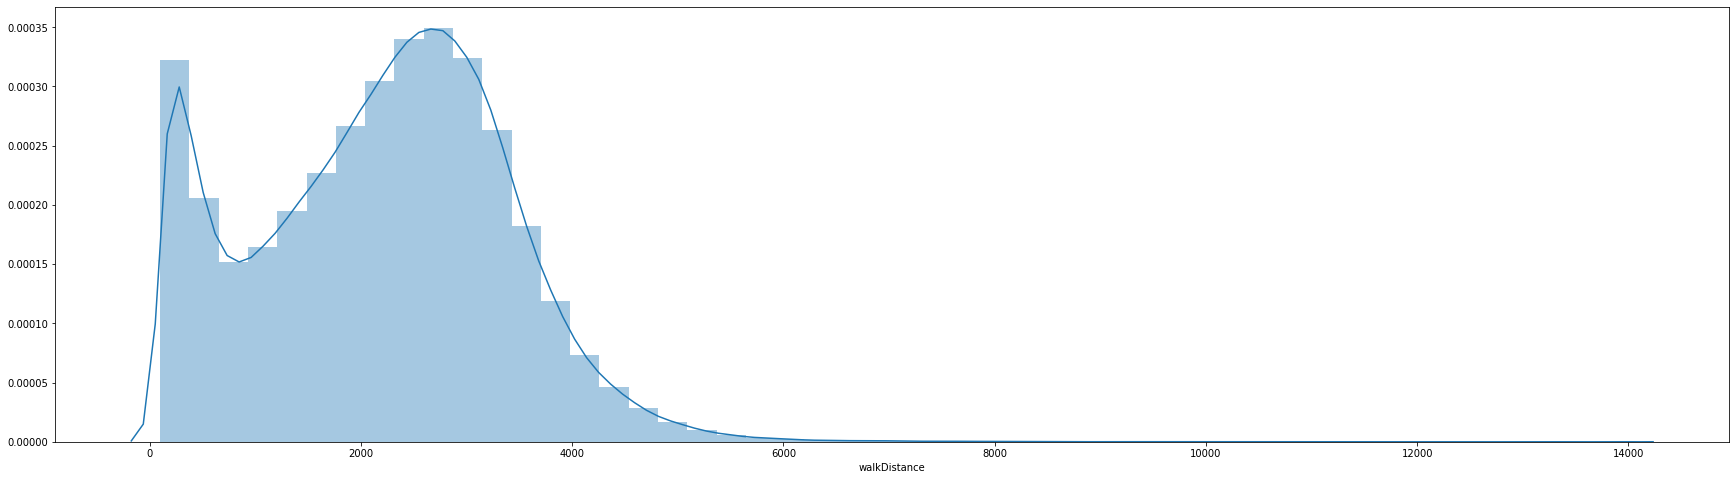

In [311]:
plt.figure(figsize=(30,8))
sns.distplot(df_copy['walkDistance'])

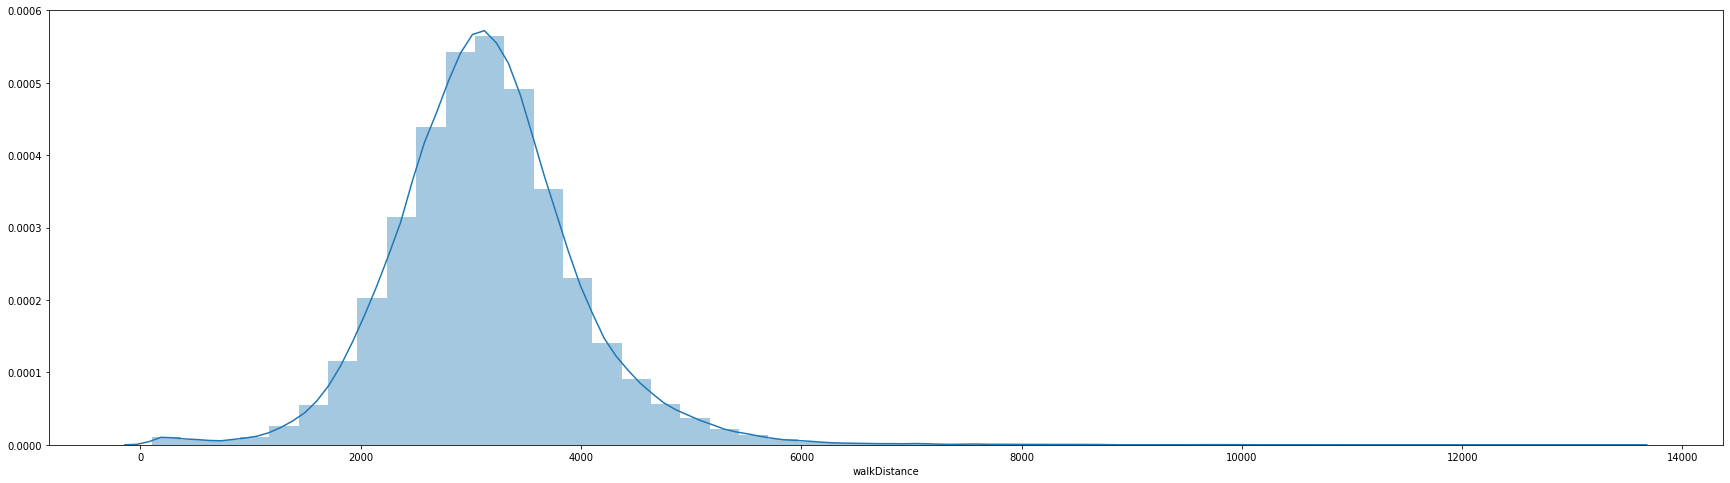

In [310]:
plt.figure(figsize=(30,8))
sns.distplot(winners['walkDistance'])

- players has more winning change if keeps on moving. 
- It confuses enemy of your location  
- Increases winning chances 

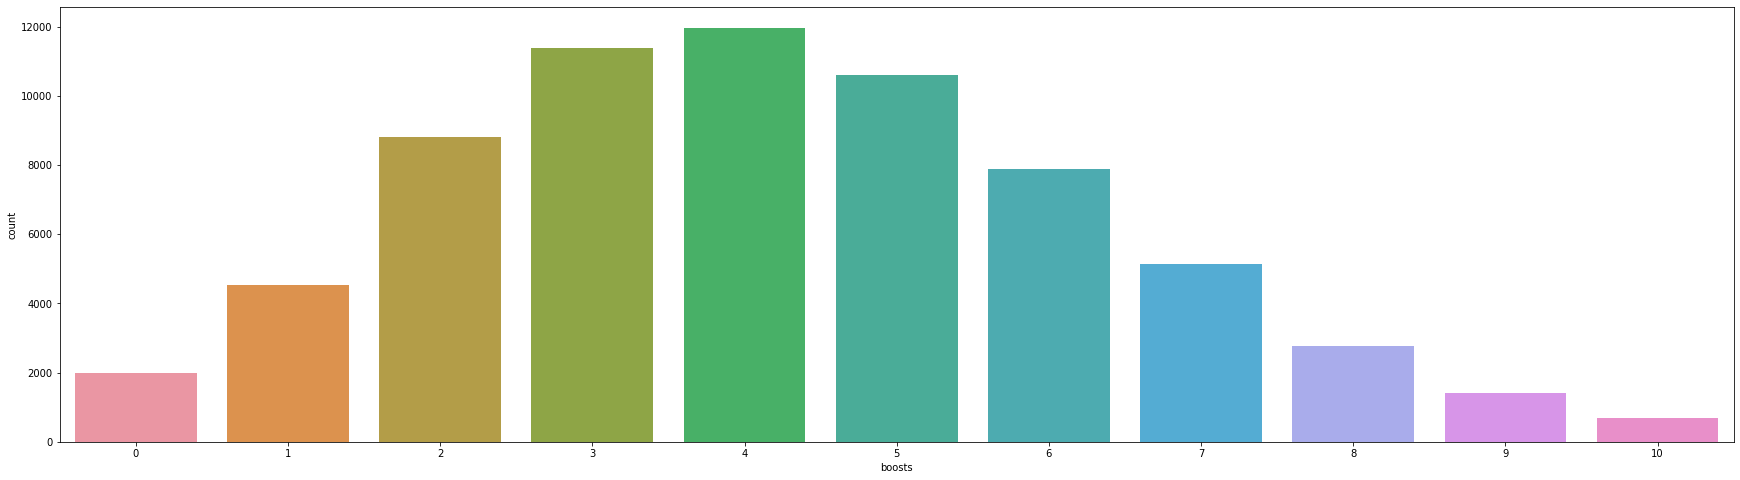

In [312]:
plt.figure(figsize=(30,8))
sns.countplot(winners['boosts'])

- most of the winning players has 4 boosts

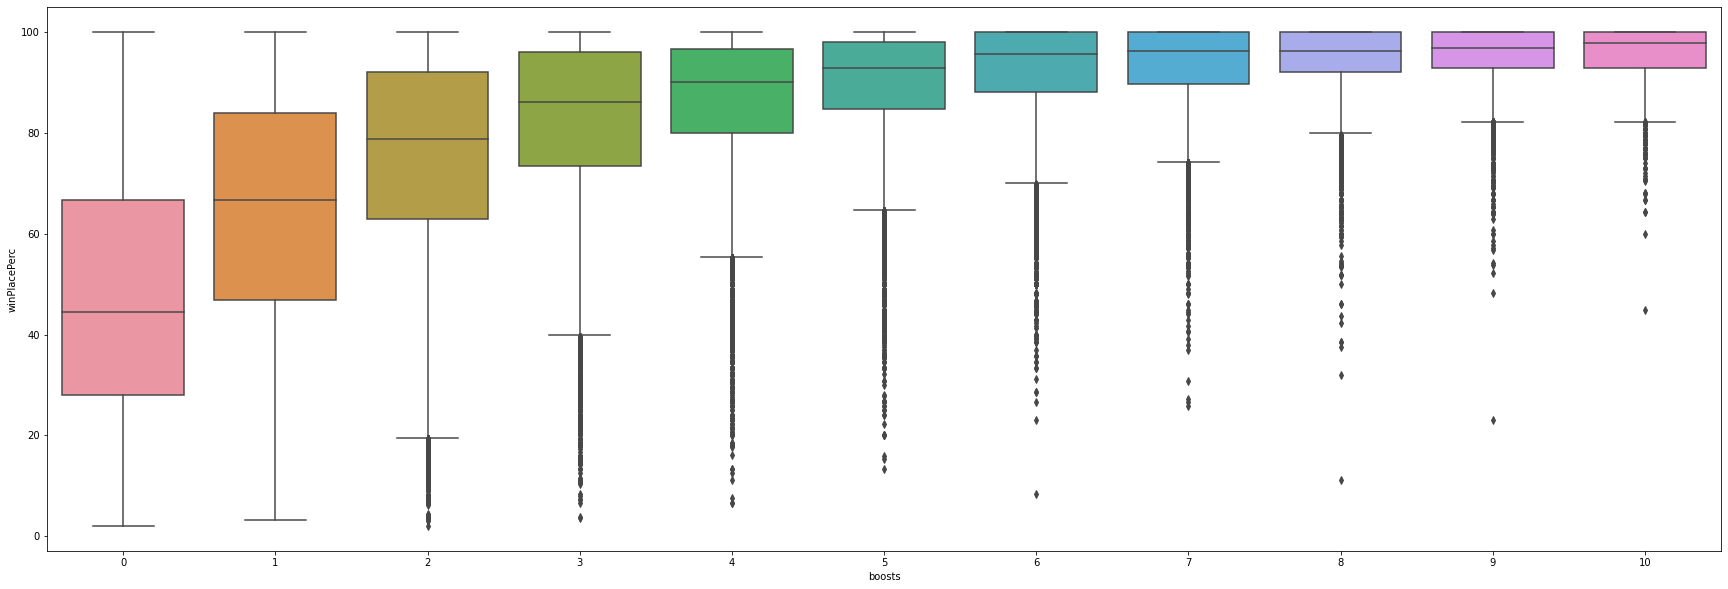

In [314]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['boosts'],y=df_copy['winPlacePerc'])

- players having more than 5 boosts has more winning chance

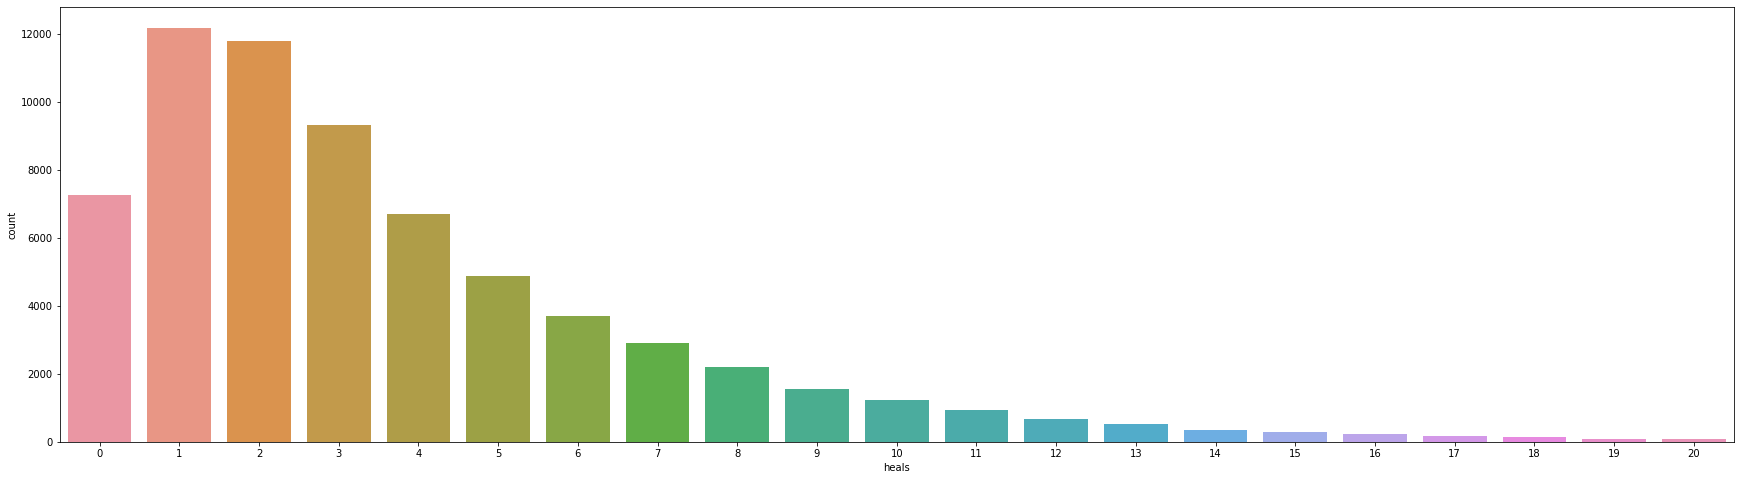

In [315]:
plt.figure(figsize=(30,8))
sns.countplot(winners['heals'])

- winners carried at lease 1 heal with them

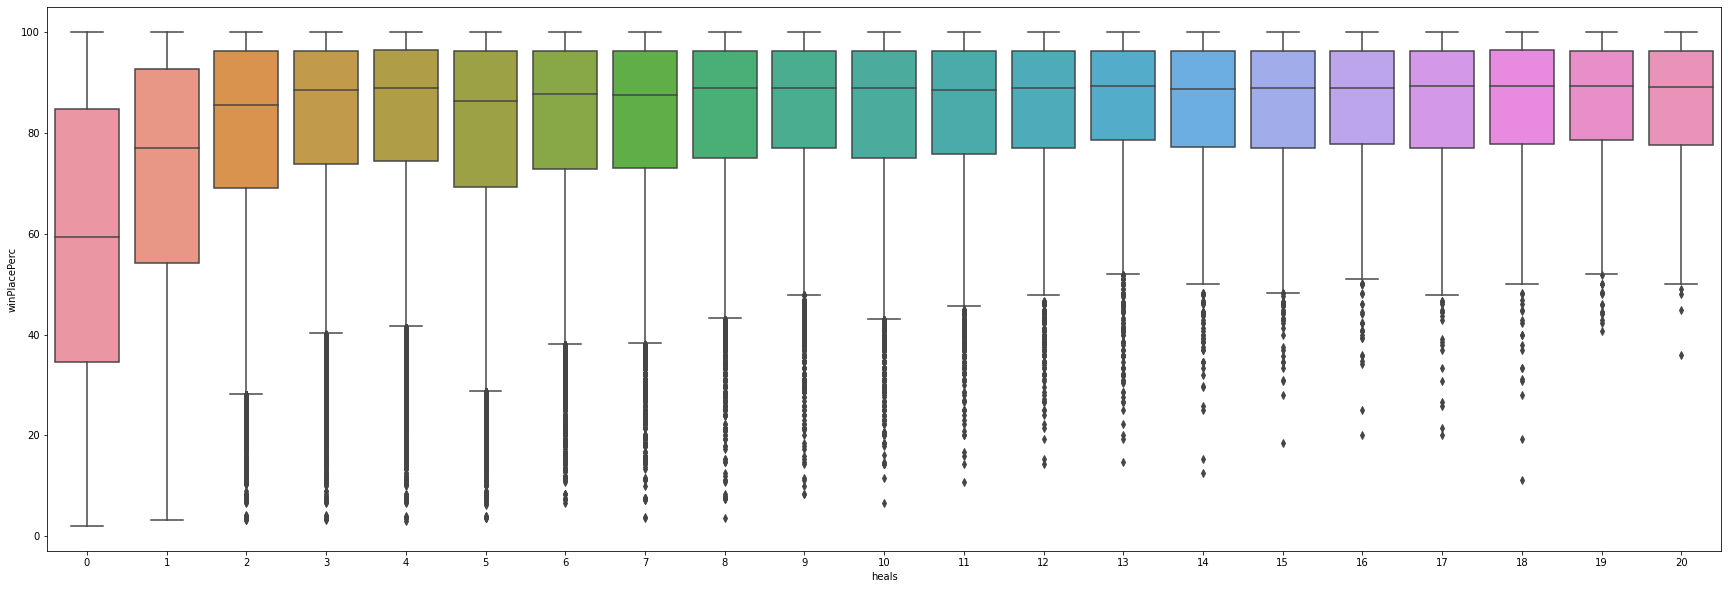

In [316]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['heals'],y=df_copy['winPlacePerc'])

- players who carried 2 heals onwards has more winning chances 

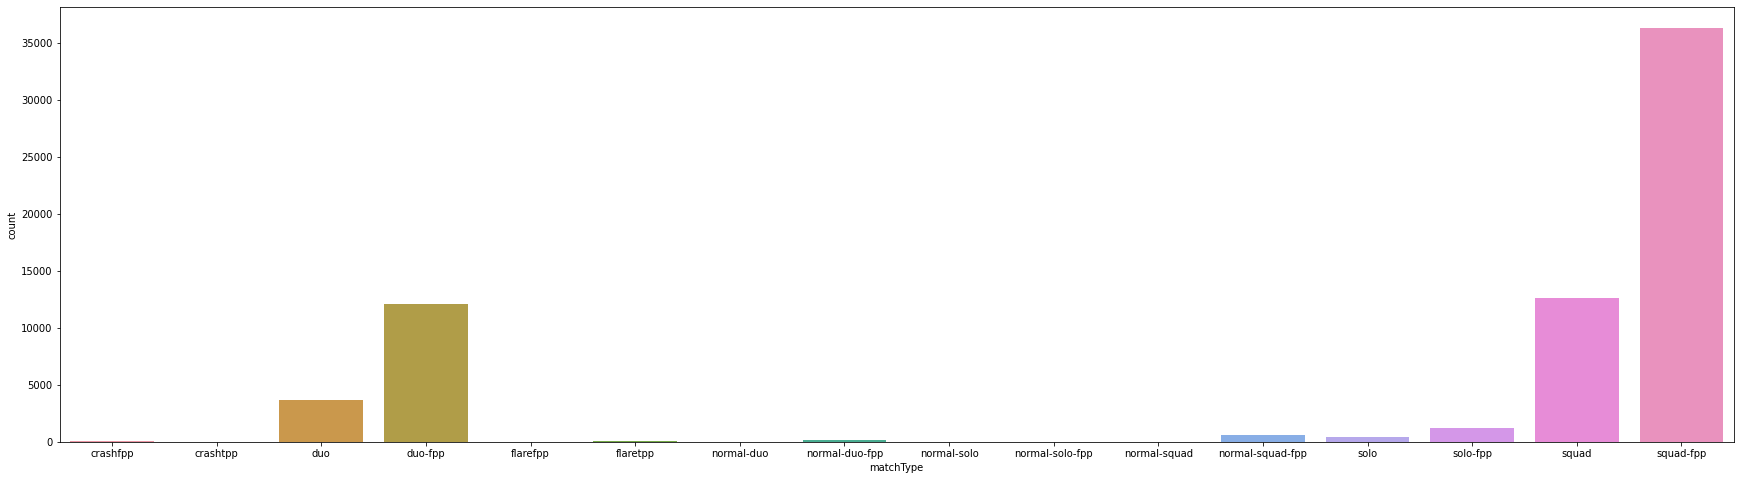

In [317]:
plt.figure(figsize=(30,8))
sns.countplot(winners['matchType'])

- most of the winners played squard-fpp

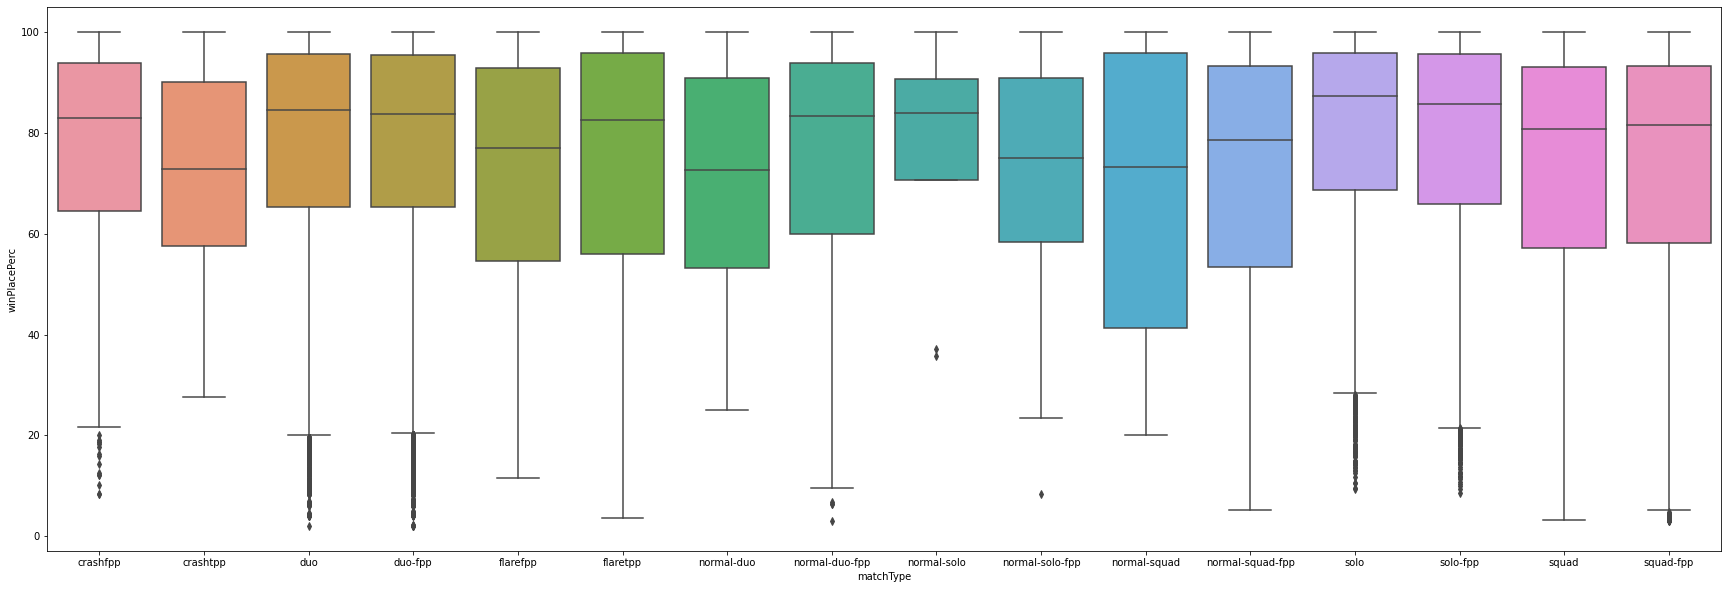

In [318]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['matchType'],y=df_copy['winPlacePerc'])

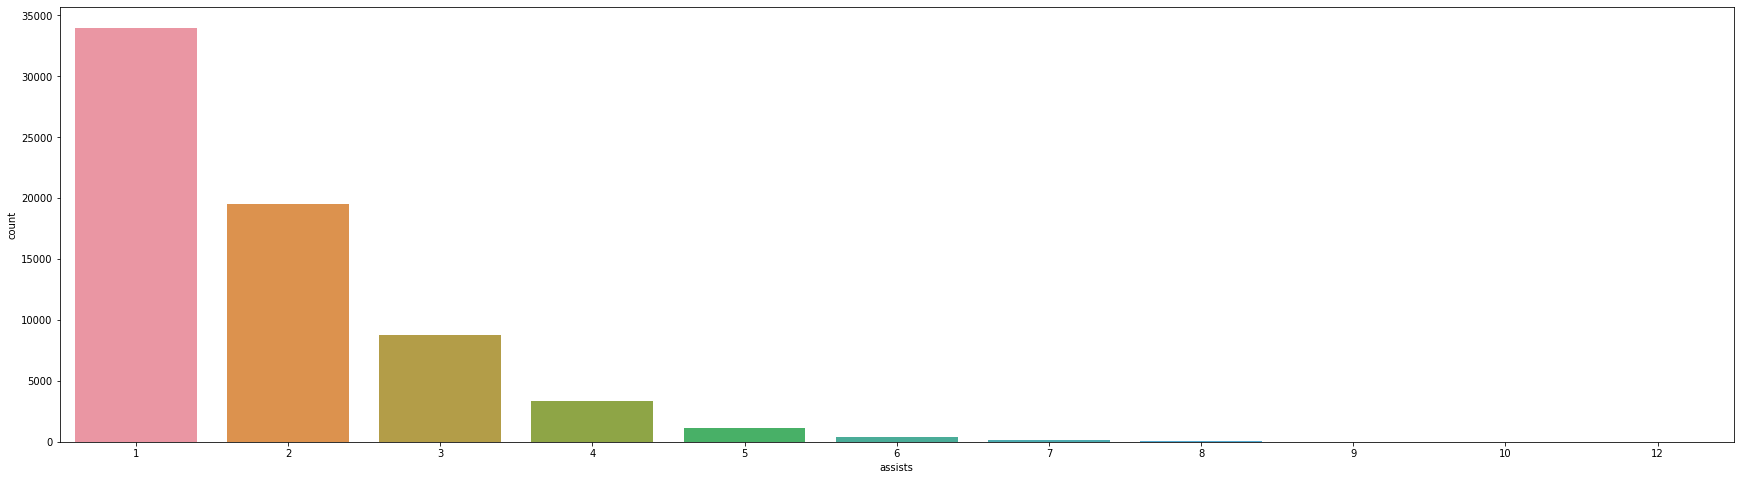

In [319]:
plt.figure(figsize=(30,8))
sns.countplot(winners['assists'])

- winners assisted at least once

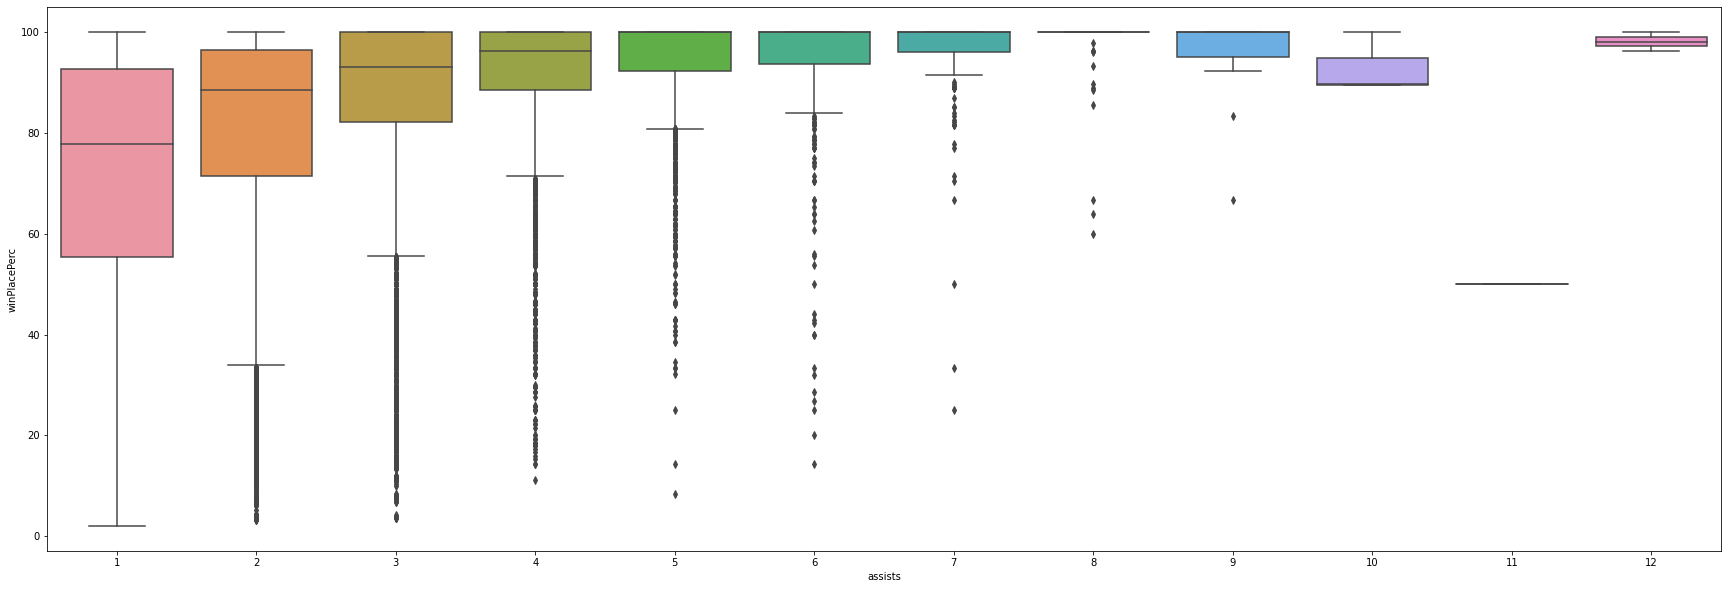

In [320]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['assists'],y=df_copy['winPlacePerc'])

 * players who assisted more than 3 times has more winning chances than others

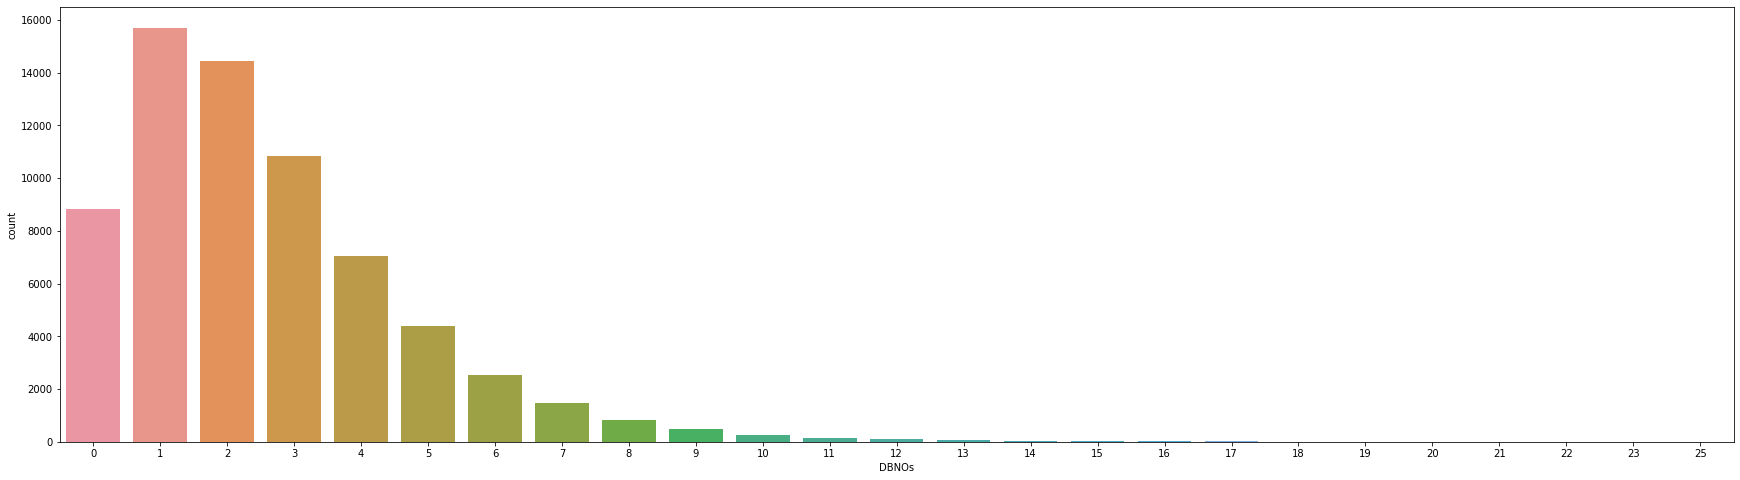

In [321]:
plt.figure(figsize=(30,8))
sns.countplot(winners['DBNOs'])

* winners knocked enemies 1 to 6 times mostly

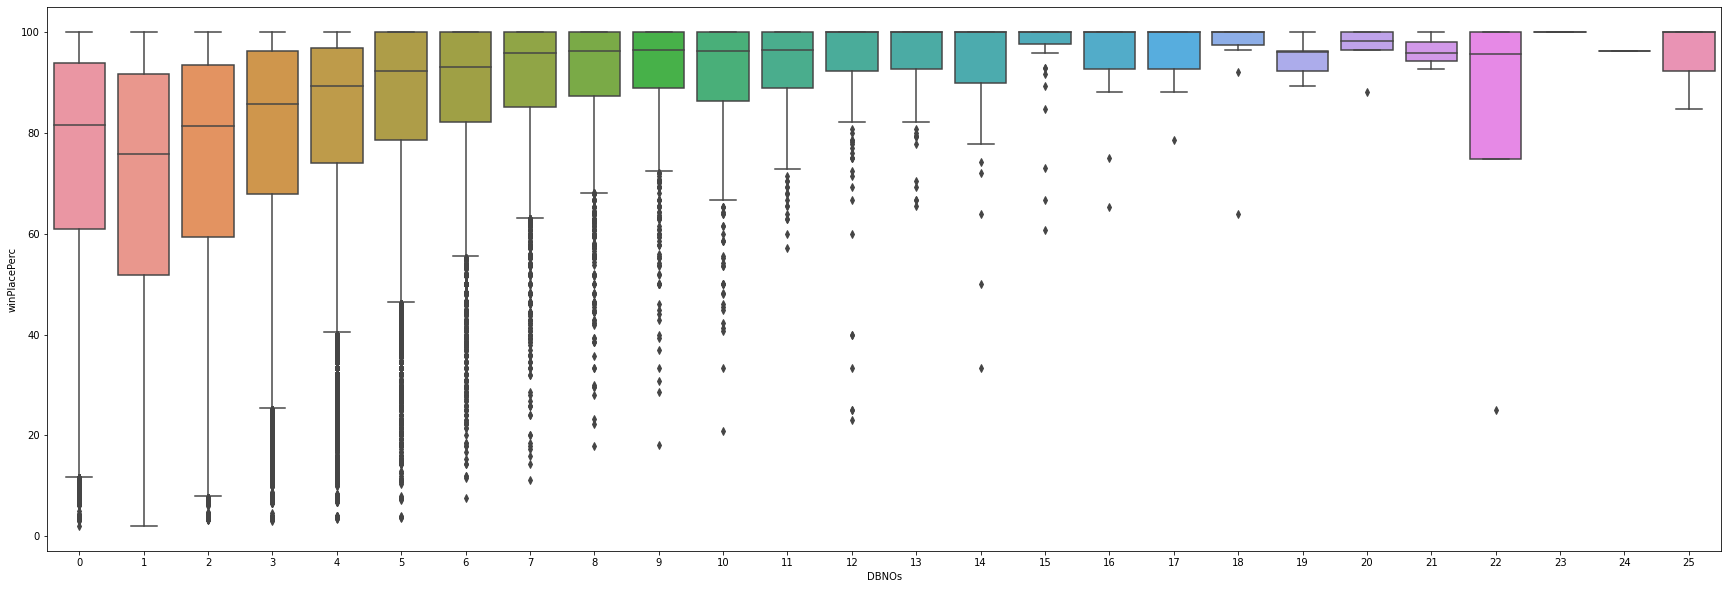

In [322]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['DBNOs'],y=df_copy['winPlacePerc'])

* players who knocked enemies more tham 5 times has higher chances of winning 

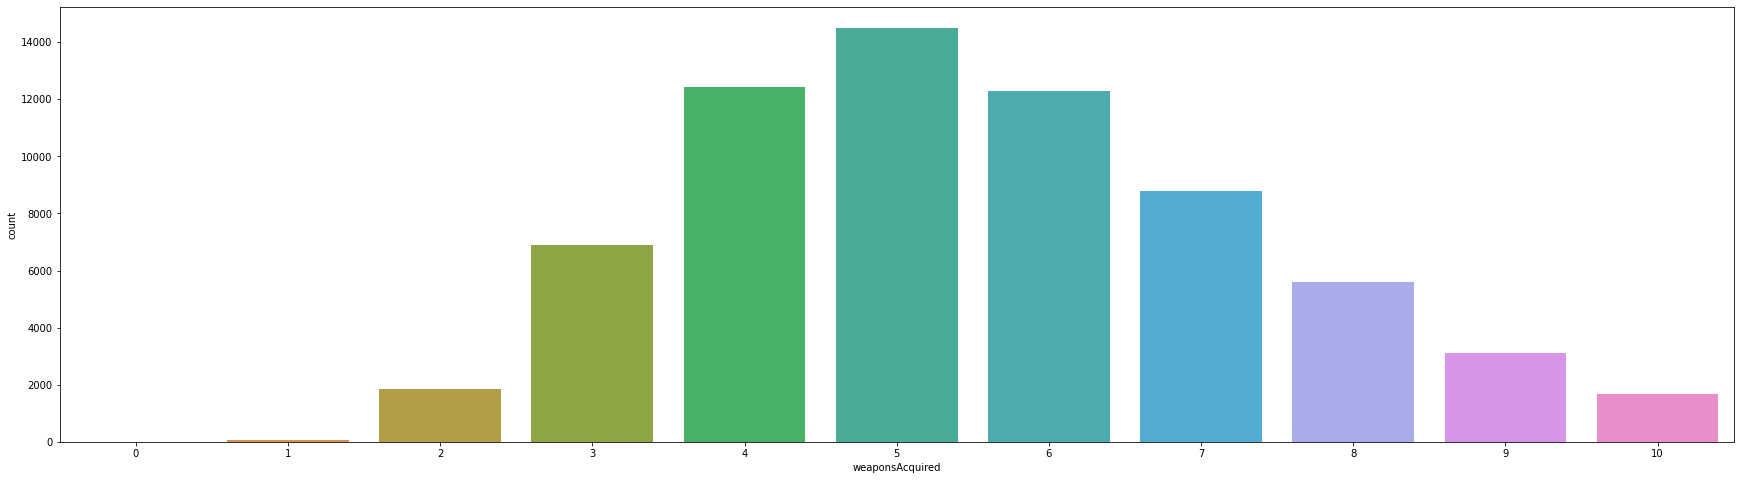

In [324]:
plt.figure(figsize=(30,8))
sns.countplot(winners['weaponsAcquired'])

- winners changed weapons for 5 times at least 

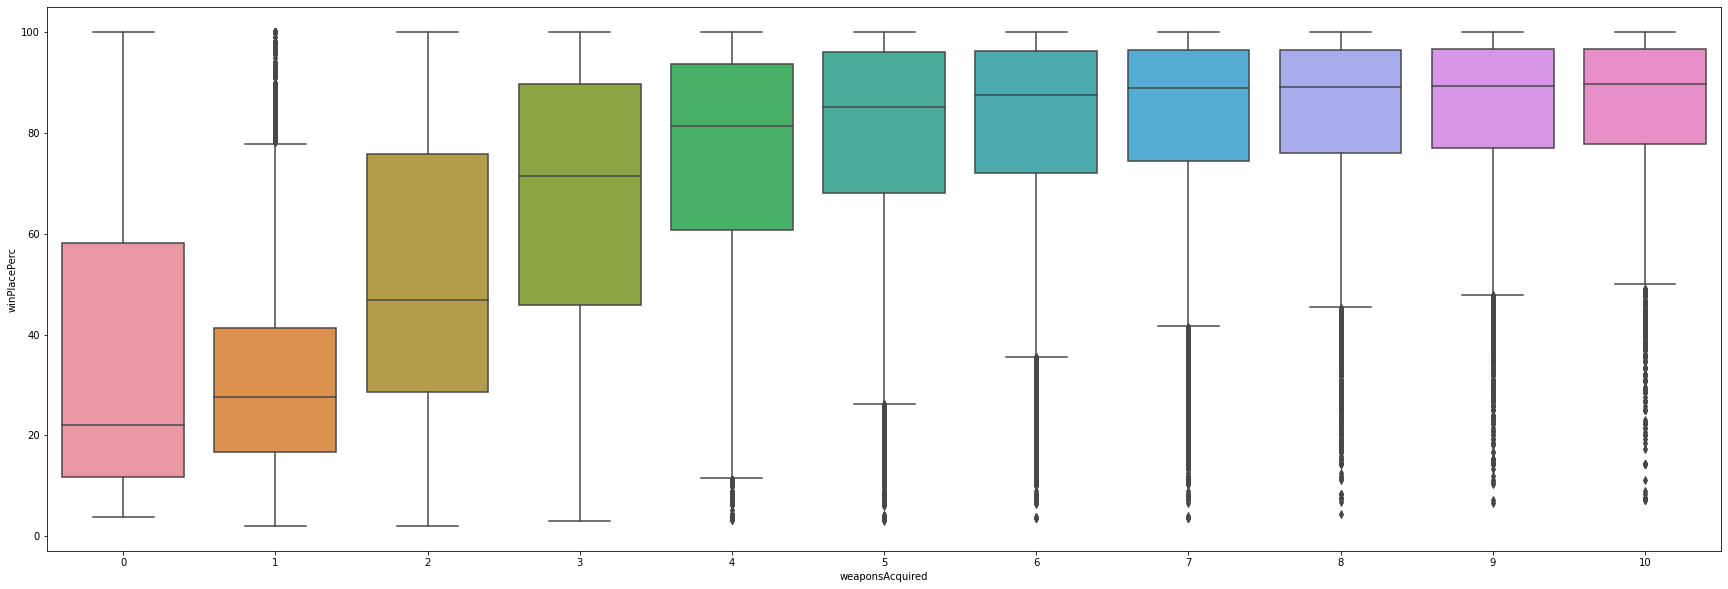

In [323]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['weaponsAcquired'],y=df_copy['winPlacePerc'])

- players who changed weapons for 5 to 10 times has more change of winning  

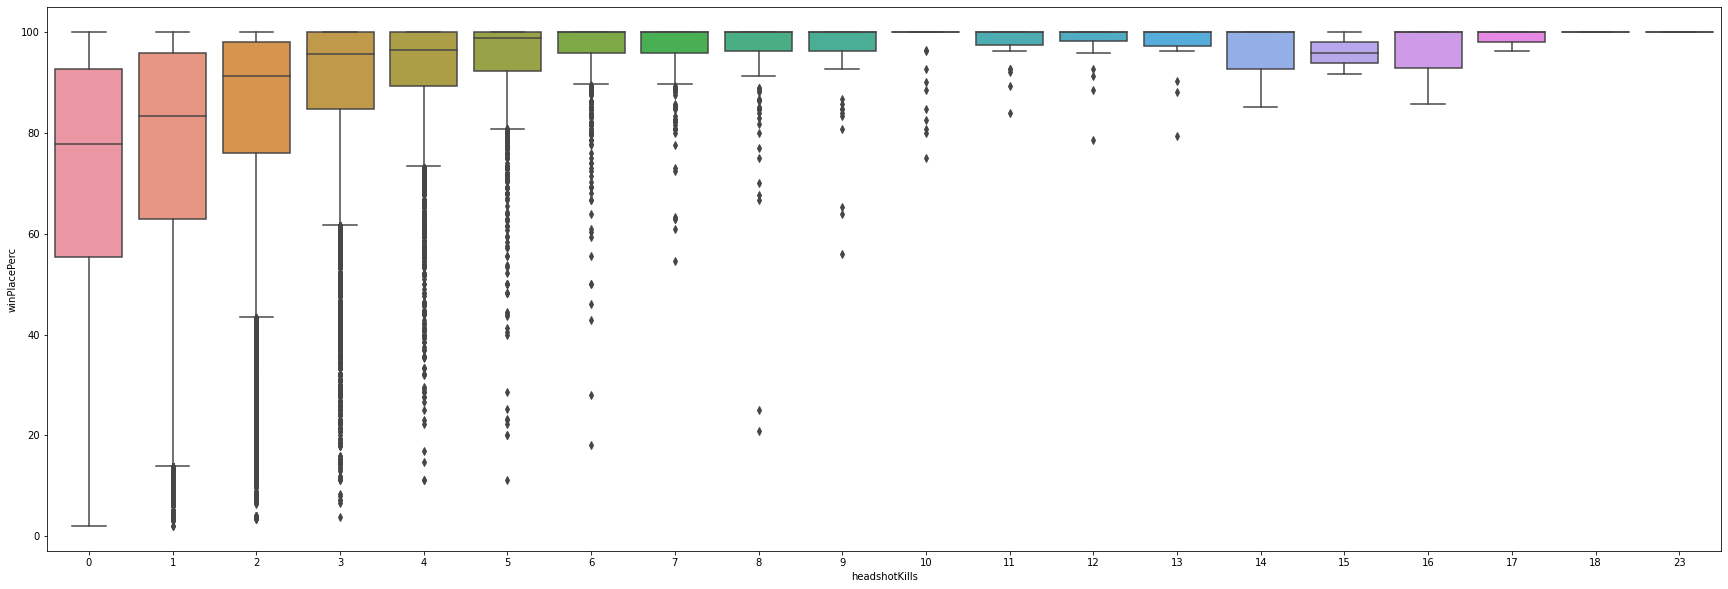

In [326]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['headshotKills'],y=df_copy['winPlacePerc'])

- players taken more than 3 headshots has more chances of winning

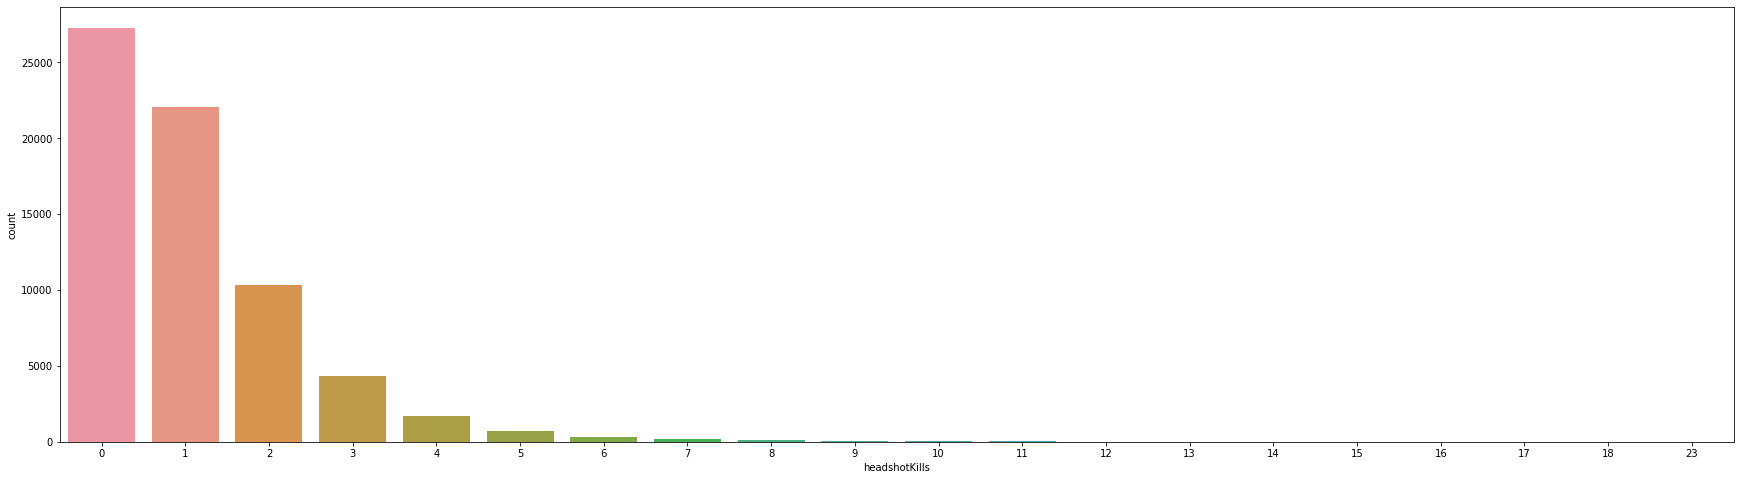

In [327]:
plt.figure(figsize=(30,8))
sns.countplot(winners['headshotKills'])

* winner has taken headshots in range of 0 to 6 mostly

In [328]:
df_copy.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
assists,1.000000,0.209288,0.273011,0.179687,0.094453,0.116657,-0.195965,0.183329,0.079669,0.148701,0.014873,0.098520,0.070493,0.004569,0.002364,0.051279,0.208754,0.112570,0.230338
boosts,0.209288,1.000000,0.427797,0.265366,0.234293,0.417911,-0.484381,0.406723,0.198441,0.270230,0.113337,0.152514,0.244252,0.015532,0.067382,0.072315,0.523208,0.291208,0.571650
damageDealt,0.273011,0.427797,1.000000,0.717406,0.525066,0.215262,-0.669767,0.845450,0.501514,0.381114,0.050603,0.147076,0.097703,0.029370,0.012101,0.075395,0.300295,0.181870,0.358783
DBNOs,0.179687,0.265366,0.717406,1.000000,0.423030,0.160336,-0.545023,0.710668,0.521016,0.298352,0.011748,0.173285,0.054284,0.024512,-0.005462,0.043097,0.186859,0.100384,0.178181
headshotKills,0.094453,0.234293,0.525066,0.423030,1.000000,0.094934,-0.430277,0.586807,0.337164,0.297130,-0.000087,0.075338,0.039116,-0.006272,0.011827,0.025235,0.173002,0.094993,0.200179
heals,0.116657,0.417911,0.215262,0.160336,0.094934,1.000000,-0.239199,0.177632,0.080483,0.122760,0.158079,0.152541,0.220517,0.012160,0.043161,0.041919,0.256023,0.179742,0.276549
killPlace,-0.195965,-0.484381,-0.669767,-0.545023,-0.430277,-0.239199,1.000000,-0.770737,-0.525861,-0.405638,-0.035629,-0.180262,-0.140904,-0.037703,-0.050132,-0.073948,-0.468569,-0.260981,-0.571791
kills,0.183329,0.406723,0.845450,0.710668,0.586807,0.177632,-0.770737,1.000000,0.621891,0.400580,-0.007914,0.166828,0.059939,0.039711,0.013342,0.077667,0.289034,0.165649,0.341219
killStreaks,0.079669,0.198441,0.501514,0.521016,0.337164,0.080483,-0.525861,0.621891,1.000000,0.156889,-0.031453,0.114117,0.021530,0.032548,0.004337,0.056879,0.139221,0.078116,0.155038
longestKill,0.148701,0.270230,0.381114,0.298352,0.297130,0.122760,-0.405638,0.400580,0.156889,1.000000,0.173972,0.036127,0.214609,0.005192,0.034022,0.080003,0.354466,0.182582,0.353784


In [329]:
winners.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
assists,1.000000,0.083205,0.199036,0.133771,0.028993,0.064117,-0.078889,0.084440,0.038009,0.074110,0.023843,0.058232,0.031283,0.003704,-0.033360,0.048126,0.054630,0.041898,NaN
boosts,0.083205,1.000000,0.287049,0.185923,0.155086,0.322858,-0.256251,0.278892,0.138857,0.061846,0.143827,0.083585,0.117221,0.006601,-0.009330,0.046883,0.096084,0.095127,NaN
damageDealt,0.199036,0.287049,1.000000,0.739683,0.582845,0.129938,-0.632231,0.866621,0.523584,0.338104,0.066714,0.093115,0.033172,0.033404,-0.030208,0.075152,0.052270,0.071007,NaN
DBNOs,0.133771,0.185923,0.739683,1.000000,0.480592,0.105088,-0.544907,0.735883,0.557419,0.309796,0.023576,0.134066,0.017420,0.030486,-0.034708,0.049871,0.064877,0.043383,NaN
headshotKills,0.028993,0.155086,0.582845,0.480592,1.000000,0.039839,-0.426540,0.626638,0.361348,0.304910,-0.010561,0.043240,-0.002133,-0.001918,-0.009046,0.026645,0.047700,0.041300,NaN
heals,0.064117,0.322858,0.129938,0.105088,0.039839,1.000000,-0.094582,0.098734,0.039202,0.020999,0.177567,0.118408,0.161248,0.005065,0.007606,0.027830,0.020957,0.074684,NaN
killPlace,-0.078889,-0.256251,-0.632231,-0.544907,-0.426540,-0.094582,1.000000,-0.742345,-0.521050,-0.321857,-0.028109,-0.104321,-0.011170,-0.036458,0.015365,-0.061823,-0.080943,-0.057548,NaN
kills,0.084440,0.278892,0.866621,0.735883,0.626638,0.098734,-0.742345,1.000000,0.627378,0.346391,-0.015791,0.113968,-0.016999,0.042288,-0.024608,0.075017,0.068171,0.059874,NaN
killStreaks,0.038009,0.138857,0.523584,0.557419,0.361348,0.039202,-0.521050,0.627378,1.000000,0.144408,-0.039166,0.079903,-0.015311,0.034760,-0.008617,0.061895,0.047300,0.028532,NaN
longestKill,0.074110,0.061846,0.338104,0.309796,0.304910,0.020999,-0.321857,0.346391,0.144408,1.000000,0.241278,-0.024691,0.204257,0.012013,-0.012316,0.089239,0.091535,0.070737,NaN


In [330]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPlacePerc'], dtype=object)

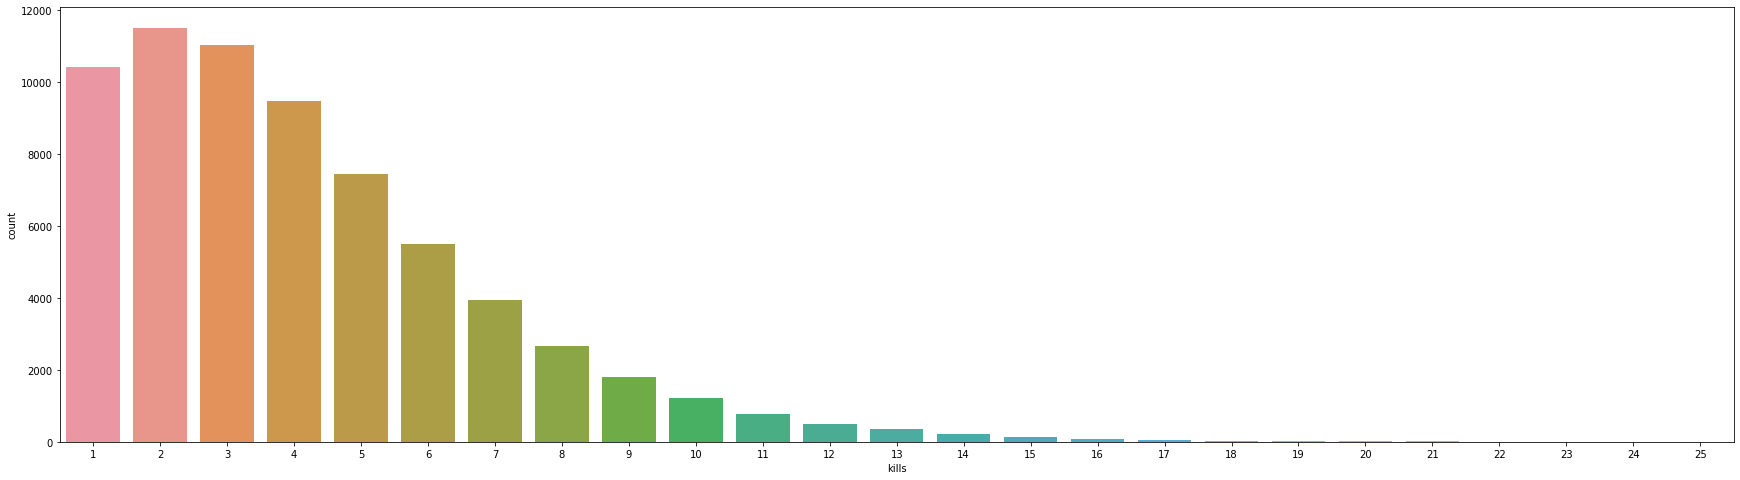

In [332]:
plt.figure(figsize=(30,8))
sns.countplot(winners['kills'])

- winners killed 1 to 12 enemies 

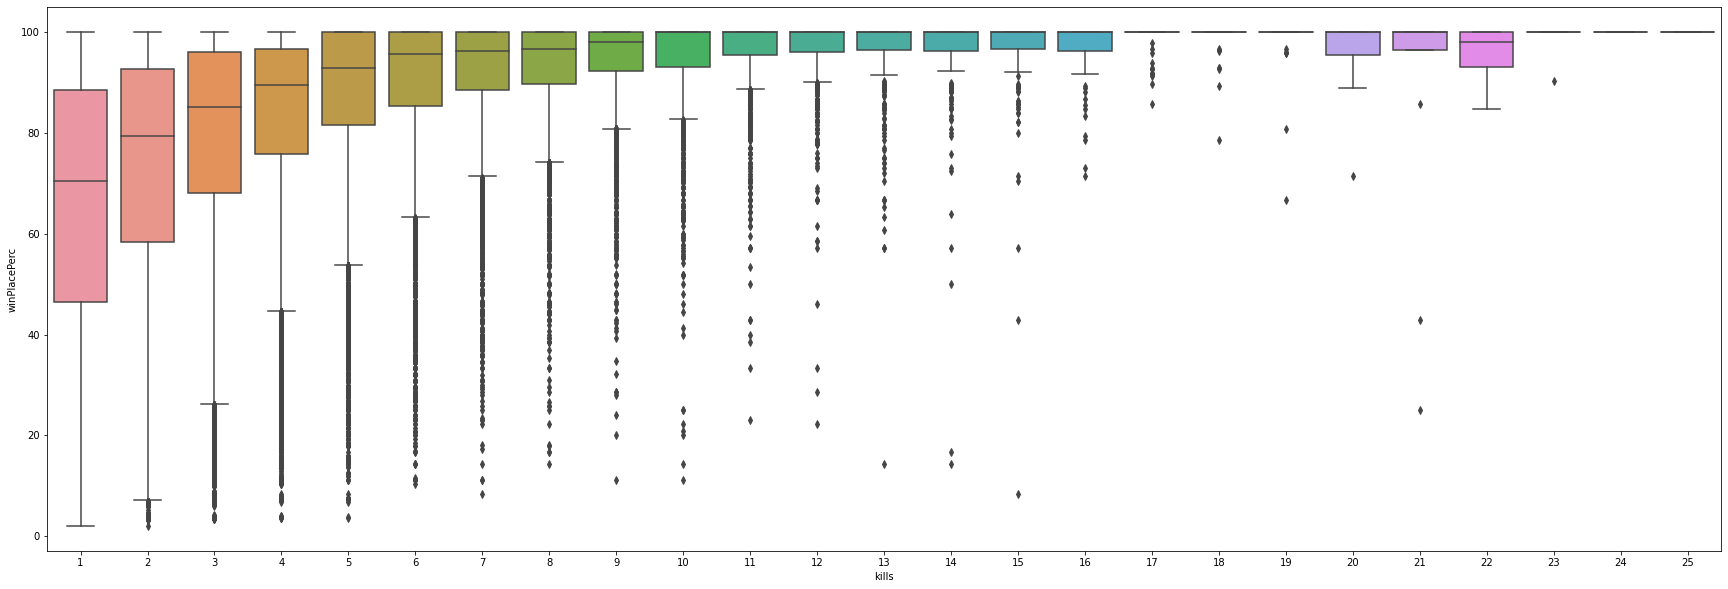

In [331]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['kills'],y=df_copy['winPlacePerc'])

- players who killed 5 enemies onward has higher chances of winning

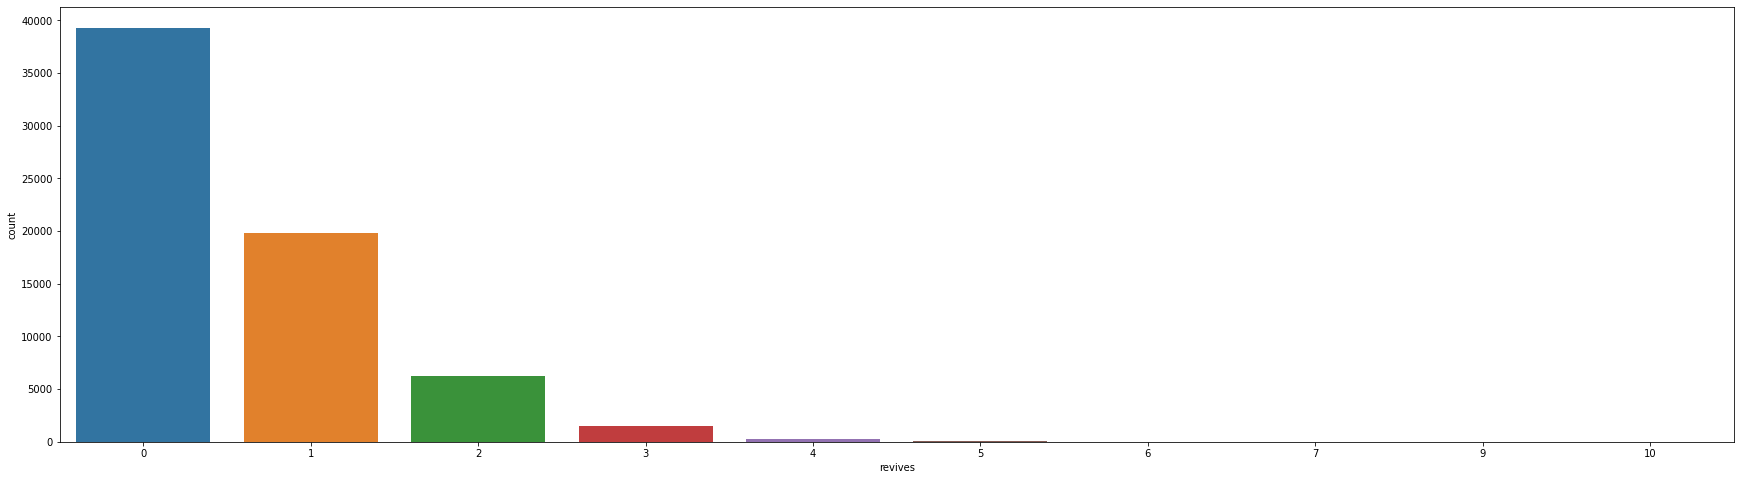

In [333]:
plt.figure(figsize=(30,8))
sns.countplot(winners['revives'])

- winners revived teamates in range of 0 to 3 times at least

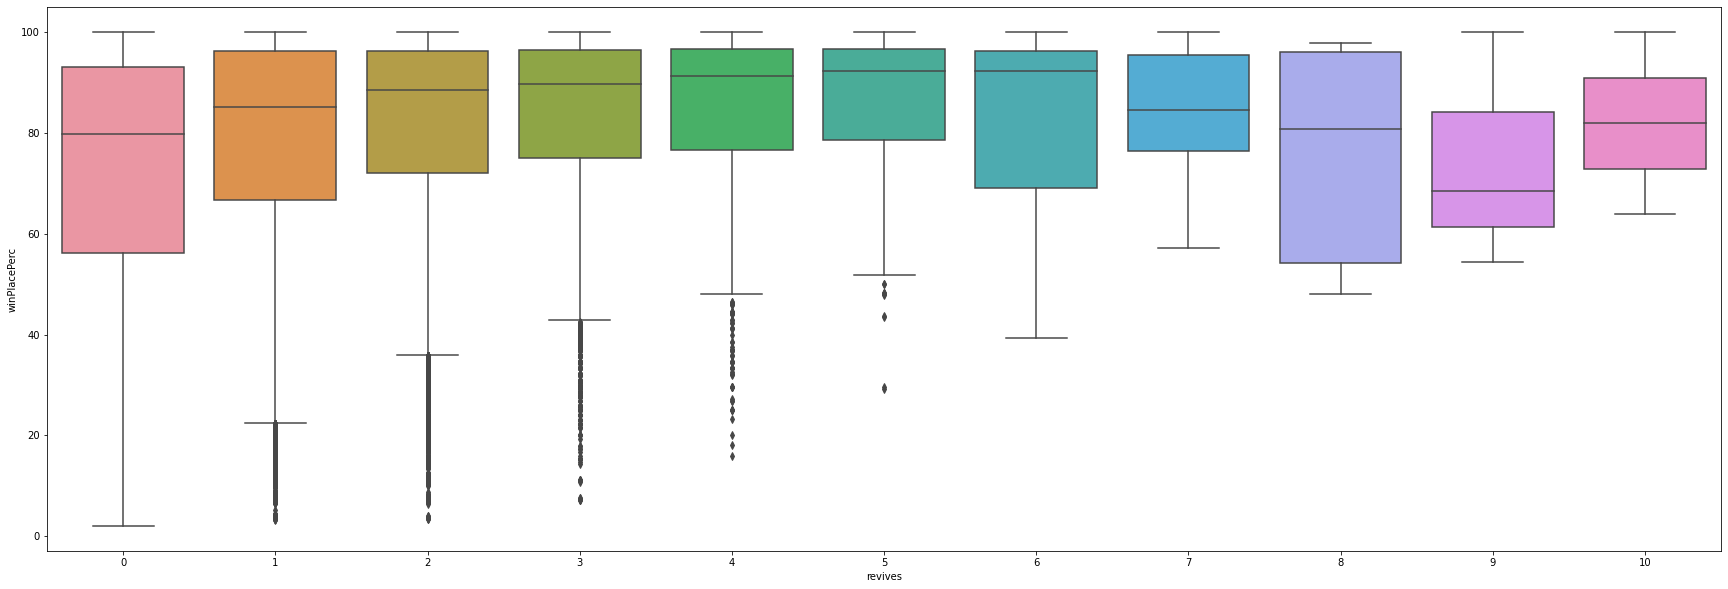

In [334]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df_copy['revives'],y=df_copy['winPlacePerc'])

* players who revived teamates 1 to 5 times has higher chance of winning

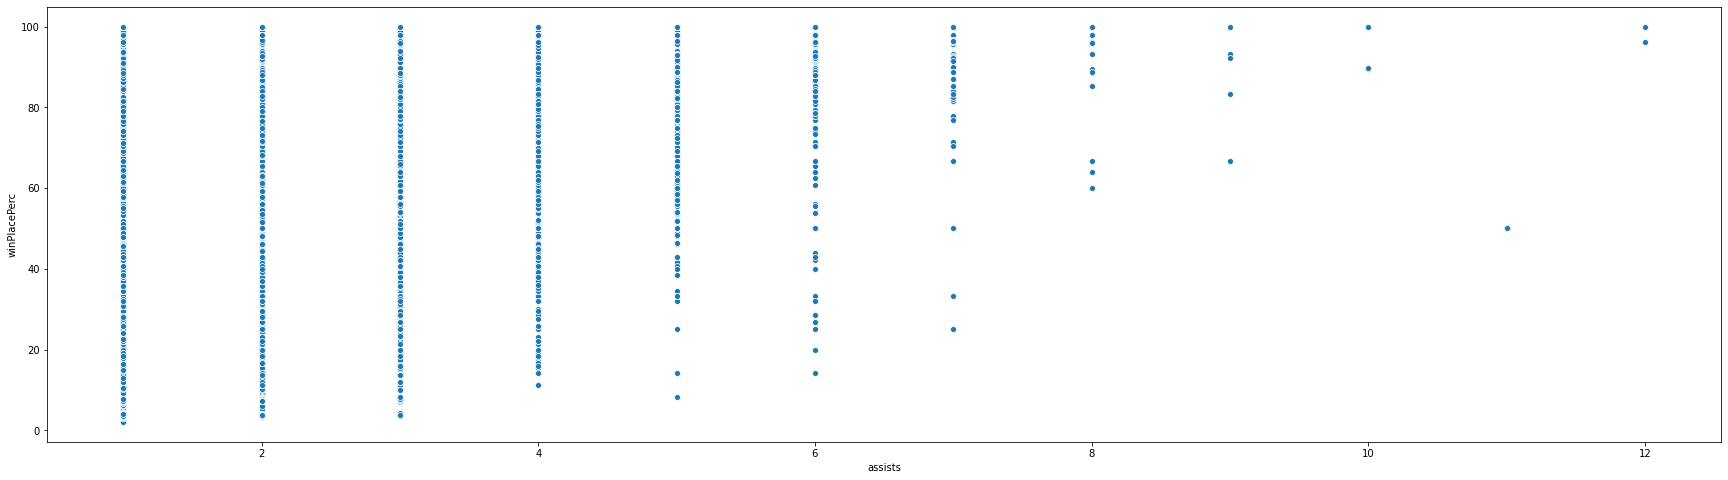

In [338]:
plt.figure(figsize=(30,8))
sns.scatterplot(x=df_copy['assists'],y=df_copy['winPlacePerc'])

* in range of 4 to 6 assists winning chances are high

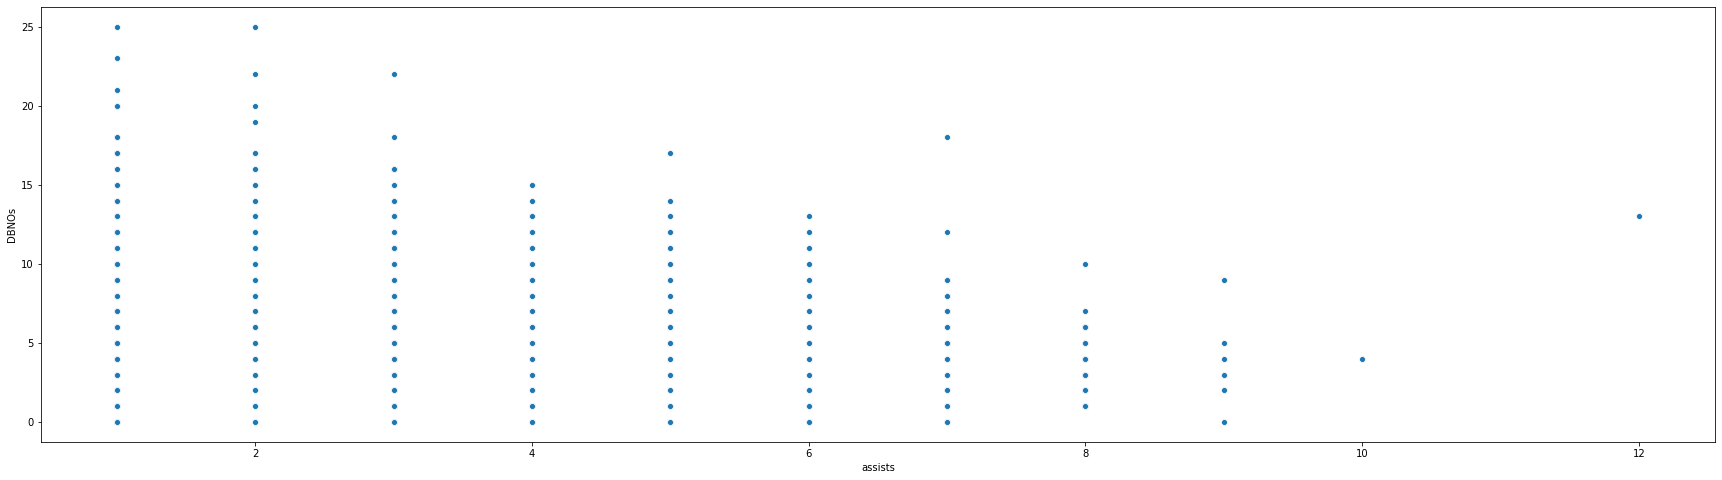

In [336]:
plt.figure(figsize=(30,8))
sns.scatterplot(x=winners['assists'],y=winners['DBNOs'])

- less assist = more kills 
- more kills = less assist

In [339]:
df_copy.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPlacePerc'], dtype=object)

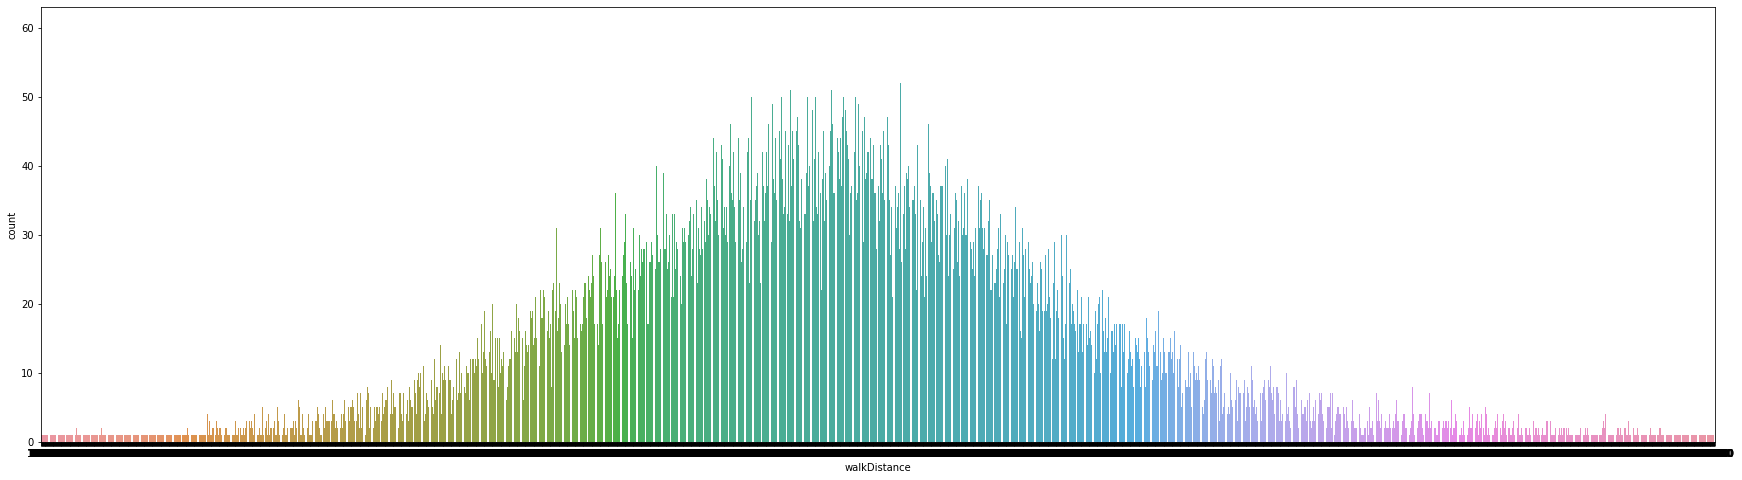

In [341]:
plt.figure(figsize=(30,8))
sns.countplot(winners['walkDistance'])

# Conclusions

**What to do at PUBG to win game**

1. Playing in a squard gives you more winning chance than in any other mode( squard will give you support, revive, heals , ammo in need and will help in getting "Winner winner Chicken Dinner)

2. Always try to assist your teammates in need while engaing with enemy. This will build trust in the group and will be benificial for everyone's survival. But dont rush in order to get more assists, it may result in your termination.

3. Try to take as less damage as possible if you want to win. More damage you receive will destry your vest and helmet and eventually you will run out of health nd die.

4. Always keep moving. Fristly it will confuse your enemy of your location thus increasing the rate of your survival and secondly it will keep you in the flow of the game. Sitting in a single place may result in leaving you out side of the zone and you may get crushed with a granade from no where.  Hence keep on moving always in the game for bettersurvival.

5. Always carry some boosts and heals in your backpack. good players carry atleast 3 boosts and 10 heals to recover heath in need.

6. Knock your enemy when u see you have a clear kill else wait for the perfect time. Good players knock 4 to 6 times enemies in a game but tends to win. Dont engage if you are not sure of the knock it may revel your location to the enemies 

7. To win and be a good player you need to kill enemies whenever you can. There is no place for mercy or teamup in PUBG. Good players kills at least 10 enemies

8. Revive your teammates when the danger is gone or when you have enough cover for your own protection. dont rush to revive when ever possible also dont just stand if revive can be done. Analyse the situation and act accordingly. good players revive their teammates generally after clearing the enemies or when the danger is no more. They does it for 3 to 5 times in everage in a single game.

9. If you aim for more assist your K.D. will fall. Hence try wipe out the full squard of the enemy with your teammates to recure your kills.

**What not to do at PUBG**

1. Dont Rush too mush in any situstion. Wait, analyse the situation and act accordingly

2. Dont sit in a single place for the whole match. You cant win in this way.

3. Dont fill your bag with unnecessary stuffs like heals>20, boosts>10, etc. keep things as much you need 

4. winners stays on land most of the time. So dont waste time swimming around. 


In [343]:
df_new=df_copy.copy()

In [344]:
df_new #data which can to used for Machine Learning purpose

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchDuration,matchType,revives,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
25,4c45dc732689ec,8e0a0ea95d3596,37f43ba55ec0a4,1,4,559,3,0,4,11,...,1841,duo-fpp,0,1183.0,0,0.0,0,2711.0,7,86.96
38,5cb863f7ac0dcd,667d7cda387b5c,2d3bb641903718,1,0,318,2,0,0,5,...,1365,duo-fpp,0,0.0,0,0.0,0,2303.0,2,70.21
45,921456e81f6fe7,8c727e2173f5b0,6415c14bf43a33,3,1,395,2,1,2,13,...,1449,squad-fpp,0,0.0,0,0.0,0,2003.0,3,80.77
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,561,5,2,9,4,...,1374,squad,0,0.0,0,0.0,0,2190.0,7,64.00
58,a02d62f153b033,69745bfb9412d9,6945783270e8dc,1,1,133,1,0,1,47,...,1196,squad-fpp,0,0.0,0,0.0,0,127.7,1,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446907,fa8d5a94bc9fda,af646efa2beba6,481a02a43e7de6,1,0,186,1,0,1,36,...,1262,squad-fpp,0,0.0,0,0.0,0,111.7,1,42.86
4446923,6af47fc1303a4a,1d0c7926278d49,25f71562df42d6,2,0,164,1,0,0,17,...,1358,squad-fpp,0,0.0,0,0.0,0,194.6,2,40.00
4446931,e059d95e0827e2,7b22962b0b7967,909e0493eb3c9d,1,1,30,0,0,1,12,...,1370,squad,2,149.3,0,0.0,0,2967.0,5,96.15
4446937,68100cdb23f1f0,9b8970931c5d00,ce5a23d8bb7883,1,2,127,1,1,4,31,...,1414,duo-fpp,0,0.0,0,0.0,0,1364.0,5,71.11
